In [15]:
import pandas as pd
from langdetect import detect
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
%matplotlib inline
import re
from wordsegment import load, segment
load()

def preprocess_text(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', text)#url
    text = re.sub('@[^\s]+','', text)#user
    text = text.lower().replace("ё", "е")
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    #text = re.sub(r"pic.twitter\S+", "", text)
    return text.lower().strip().split()

def preprocess_textV2(text):
    text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
                   '', text, flags=re.MULTILINE) # to remove links that start with HTTP/HTTPS in the tweet
    print()
    text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
                   '', text, flags=re.MULTILINE) # to remove other url links
    print(text)
    text = ''.join(re.sub("([0-9A-Za-z \t])|(\w+:\/\/\S+)",
                           " ",text).split())
    print(text)
    text = ' '.join(segment(text))
    print(text)
    text = re.sub(r"pic.twitter\S+", "", text)
    print(text)
    return text.lower().strip().split()

gist_file = open("gist_stopwords.txt", "r")
try:
    content = gist_file.read()
    stopwords = content.split(",")
finally:
    gist_file.close()

In [19]:
df = pd.read_csv('Covid_Malaysia.csv')
print (df.head(10))

   Unnamed: 0                   id      conversation_id     created_at  \
0           0  1301755052869124096  1301755052869124096  1599197564000   
1           1  1301401530973601792  1301401530973601792  1599113278000   
2           2  1301436675365597184  1301436675365597184  1599121657000   
3           3  1301344643284492288  1301344643284492288  1599099715000   
4           4  1301716425766297600  1301716425766297600  1599188355000   
5           5  1301656793769062400  1301656793769062400  1599174137000   
6           6  1301344643284492288  1301344643284492288  1599099715000   
7           7  1301436675365597184  1301436675365597184  1599121657000   
8           8  1301574966333206529  1301574966333206529  1599154628000   
9           9  1282948205043314690  1282948181991415809  1594713662000   

                  date                       timezone  place  \
0  2020-09-04 13:32:44  Malay Peninsula Standard Time    NaN   
1  2020-09-03 14:07:58  Malay Peninsula Standard Time    

['total', 'hypocrisy', 'in', 'quarantine', 'covid19', 'url']
['covid', '19', '17', 'new', 'cases', 'one', 'casualty', 'bringing', 'death', 'toll', 'to', '126', 'url', 'url']
['the', 'philippines', 'is', 'seeking', 'a', 'fresh', '6', 'million', 'p29', '1', 'billion', 'loan', 'from', 'the', 'world', 'bank', 'wb', 'to', 'extend', 'its', 'conditional', 'cash', 'grants', 'to', 'poor', 'families', 'amid', 'the', 'coronavirus', 'disease', '2', '19', 'covid', '19', 'pandemic', 'url']
['f', 'b', 'outlets', 'at', 'bugis', 'junction', 'orchard', 'central', 'among', 'places', 'visited', 'by', 'covid', '19', 'cases', 'url']
['orchard', 'road', 'malls', 'geylang', 'serai', 'market', 'among', 'new', 'places', 'visited', 'by', 'covid', '19', 'patients', 'while', 'infectious', 'url', 'pic', 'twitter', 'com', 'zdiyol', 'qs4']
['the', 'ultimate', 'guide', 'to', 'recent', 'covid', '19', 'measures', 'updates', 'in', 's', 'pore', 'because', 'everything', 'changes', 'too', 'fast', 'liao', 'url']
['the', 'gov

['just', 'in', 'singapore', 'reports', '49', 'new', 'covid19', 'infections', 'including', '3', 'imported', 'cases', 'and', '3', 'in', 'the', 'community', 'url', 'pic', 'twitter', 'com']
['today', 'i', 'was', 'invited', 'to', 'speak', 'at', 'a', 'special', 'dialogue', 'on', 'covid', '19', 'malaysia', 's', 'journey', 'towards', 'flattening', 'the', 'curve', 'at', 'the', 'malaysian', 'healthcare', 'conference', 'organised', 'by', 'the', 'ksi', 'strategic', 'institute', 'for', 'asia', 'pacific', 'health', 'unites', 'us', 'all', 'let', 'us', 'be', 'united', 'in', 'our', 'war', 'against', 'covid', '19', 'pic', 'twitter', 'com']
['trump', 'is', 'illegitimatepresident', 'removetrumpnow', 'indicttrump', 'trumpisalaughingstock', 'trumpisanationaldisgrace', 'trumpisaliar', 'traitortrump', 'trumpisacriminal', 'trumpgopgenocide', 'covid', '19', 'coronavirus', 'trumpcorruption', 'trumpownseverydeath', 'strongertogether', 'resistersunite', 'facts', 'pic', 'twitter', 'com']
['covid', '19', 'cases', 'c

['what', 'a', 'shameless', 'tweet', 'this', 'is', 'the', 'covid', 'curve', 'rising', 'and', 'india', 'on', 'top', 'of', 'list', 'of', 'countries', 'with', 'covid', 'infections', 'but', 'this', 'guy', 'is', 'not', 'falling', 'short', 'doing', 'politics']
['addenda', 'to', 'the', 'president', 's', 'address', 'mccy', 'mof', 'on', 'partnering', 'the', 'people', 'and', 'emerging', 'stronger', 'from', 'covid', '19', 'url']
['advances', 'in', 'plantscience', 'and', 'the', 'collaboration', 'amongst', 'like', 'minded', 'stakeholders', 'is', 'needed', 'to', 'achieve', 'foodsecurity', 'as', 'we', 'emerge', 'into', 'this', 'post', 'covid', 'world', 'url', 'pic', 'twitter', 'com']
['hungary', 'covid', 'infections', 'hit', 'daily', 'record', 'as', 'school', 'year', 'starts', 'malay', 'mail', 'url']
['saf', 'to', 'progressively', 'resume', 'in', 'camp', 'training', 'ippt', 'from', 'october', 'nsmen', 'returning', 'for', 'unit', 'level', 'training', 'will', 'be', 'tested', 'for', 'covid19', 'url', 'pi

['there', 'is', 'no', '2nd', 'homeland', 'restore', 'commonsense', 'removetrumpnow', 'america', 'needs', 'your', 'help', 'more', 'than', 'ever', 'trump', 'trumpvirusdeathtoll186k', 'covid', '19', 'trumpgenocide', 'trumpviolence', 'trumpriots', 'traitortrump', 'trumpisaliar', 'trumpisanationaldisgrace', 'trumpisunfit', 'resist', 'truth', 'pic', 'twitter', 'com', 'kngkk', 'bmcw']
['after', 'months', 'of', 'heartache', 'signs', 'of', 'covid', '19', 'easing', 'in', 'brazil', 'url', 'pic', 'twitter', 'com']
['eu', 'working', 'on', 'further', 'covid', '19', 'vaccine', 'contracts', 'merkel', 'url', 'pic', 'twitter', 'com', 'sbbcvmo', 'ek']
['how', 'would', 'covid19', 'vaccines', 'be', 'distributed', 'fairly', 'across', 'countries', 'once', 'they', 'are', 'made', 'available', 'dr', 'user', 'from', 'nusmedicine', 'user', 'is', 'part', 'of', 'a', 'group', 'of', 'authors', 'who', 'have', 'put', 'together', 'an', 'ethical', 'framework', 'for', 'global', 'vaccine', 'allocation', 'url']
['singapore'

['whether', 'it', 'is', 'our', 'pushback', 'on', 'china', 'or', 'fight', 'against', 'covid', '19', 'or', 'the', 'economy', 'or', 'any', 'other', 'issue', 'for', 'that', 'matter', 'there', 's', 'a', 'small', 'vocal', 'group', 'of', 'people', 'who', 're', 'firmly', 'against', 'india', 'their', 'life', 's', 'mission', 'is', 'to', 'celebrate', 'every', 'setback', 'mourn', 'nitpick', 'at', 'success', 'sad', 'waste', 'of', 'life']
['selangor', 'journal', 'actor', 'dwayne', 'johnson', 'says', 'he', 'and', 'family', 'have', 'recovered', 'from', 'covid', '19', 'url', 'pic', 'twitter', 'com']
['johor', 'and', 'penang', 'free', 'of', 'covid', '19', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'url']
['emergency', 'authorisation', 'of', 'covid', '19', 'vaccines', 'needs', 'great', 'care', 'says', 'who', 'malay', 'mail', 'url']
['51', 'new', 'covid', '19', 'infections', 'in', 'singapore', 'including',

['skyline', 'luge', 'sentosa', 'universal', 'studios', 'and', 'orchard', 'road', 'malls', 'among', 'places', 'visited', 'by', 'covid', '19', 'cases', 'during', 'infectious', 'period', 'url', 'pic', 'twitter', 'com']
['ict', 'ippt', 'to', 'resume', 'progressively', 'nsmen', 'will', 'be', 'tested', 'for', 'covid', '19', 'url']
['singapore', 'has', 'done', 'well', 'in', 'fight', 'against', 'covid', '19', 'but', 'must', 'learn', 'from', 'errors', 'pm', 'lee', 'url', 'pic', 'twitter', 'com']
['five', 'people', 'who', 'tested', 'positive', 'for', 'covid19', 'in', 'new', 'zealand', 's', 'isolation', 'facilities', 'had', 'negative', 'results', 'before', 'leaving', 'india', 'url']
['if', 'no', 'one', 'is', 'above', 'the', 'law', 'why', 'is', 'trump', 'still', 'in', 'wh', 'removetrumpnow', 'indicttrump', 'trumpisaliar', 'trumpisacriminal', 'traitortrump', 'trumpviruscatastrophe', 'covid19', 'trumpisaracist', 'racistinchief', 'treasonoustrump', 'trumpelectionsabotage', 'trumpcheats', 'trumpthreat

['commentary', 'south', 'korea', 'had', 'covid', '19', 'under', 'control', 'and', 'then', 'august', 'happened', 'url', 'pic', 'twitter', 'com']
['kes', 'positif', 'mengikut', 'negeri', 'setakat', '25', '8', '2', '2', '12', 'pm', 'confirmed', 'cases', 'by', 'state', 'as', 'of', '25', '8', '2', '2', '12', 'pm', 'covid19', 'kitateguhkitamenang', 'sihatmilikku', 'walkthetalk', 'pic', 'twitter', 'com', 'vxjj', 'rspsw']
['each', 'day', 'of', 'trump', 'in', 'wh', 'reduces', 'chances', 'of', 'recovery', 'time', 'is', 'of', 'the', 'essence', 'removetrump', 'trumpisaliar', 'trumpriots', 'trumpisnotwell', 'trumpisunwell', 'trumpvirus', 'covid19', 'coronavirus', 'trumpout2', '2', 'trumpgenocide', 'trumpcrimefamily', 'trumpchaos', 'trumprussiacollusion', 'resist', 'truth', 'pic', 'twitter', 'com']
['im', 'sabahan', 'and', 'im', 'malaysian', 'im', 'proud', 'to', 'be', 'born', 'in', 'malaysia', 'looks', 'how', 'malaysia', 'handling', 'the', 'covid', 'pandemic']
['kaaan', 'omg', 'its', 'already', 'dis

['user', 'user', 'no', 'one', 'will', 'be', 'safe', 'from', 'covid19', 'until', 'everyone', 'is', 'safe', 'will', 'you', 'invest', 'just', '1', 'of', 'what', 'canada', 's', 'spent', 'so', 'far', 'on', 'the', 'response', 'at', 'home', 'to', 'fund', 'global', 'humanitarian', 'efforts', 'and', 'help', 'provide', 'tests', 'treatments', 'and', 'vaccines', 'for', 'all', 'globalgoalunite']
['covid', '19', 'update', 'sept', '1', 'australia', 's', 'victoria', 'state', 'reports', '7', 'new', 'cases', 'lowest', 'in', 'two', 'months', 'url']
['people', 'either', 'love', 'their', 'country', 'or', 'they', 'support', 'trump', 'because', 'they', 'hate', 'their', 'country', 'people', 'cannot', 'do', 'both', 'removetrumpnow', 'trumpisnotwell', 'trumpstroke', 'trumpviolence', 'trumpvirus', 'covid19', 'covid', '19', 'racism', 'trumpriots', 'traitors', 'trumpterrorism', 'trumpisaliar', 'resist', 'truth', 'pic', 'twitter', 'com']
['how', 'covid19', 'will', 'help', 'lead', 'the', 'shift', 'to', 'ai', 'first'

['if', 'i', 'can', 'stay', 'at', 'home', 'for', 'months', 'at', 'home', 'because', 'of', 'covid', 'i', 'definitely', 'can', 'wait', 'alittle', 'more', 'for', 'got7', 'ahgaseswaitingforgot7', 'user', 'got7']
['slice', 'of', 'life', 'apocalypse', 'hair', 'all', 'set', 'for', 'our', 'next', 'metal', 'festival', 'we', 'look', 'more', 'like', 'unwashed', 'stoners', 'but', 'feat', 'user', 'and', 'user', 'sakart', 'comics', 'comic', 'covid19', 'lockdown', 'quarantine', 'longhair', 'heavymetal', 'rocknroll', 'music', 'horns', 'pic', 'twitter', 'com']
['no', 'cramming', 'as', 'new', 'covid', '19', 'rules', 'take', 'hold', 'in', 'south', 'korean', 'capital', 'malay', 'mail', 'url']
['covid', '19', 'simple', 'tests', 'that', 'will', 'tell', 'us', 'if', 'our', 'mask', 'actually', 'works', 'masks', 'will', 'reduce', 'transmission', 'of', 'covid', '19', 'alongside', 'other', 'control', 'measures', 'if', 'enough', 'people', 'wear', 'them', 'they', 'may', 'even', 'help', 'avoid', 'lockdowns', 'but', '

['malaysians', 'more', 'digitally', 'inclined', 'cash', 'usage', 'declined', 'since', 'covid', '19', 'url', 'pic', 'twitter', 'com']
['me', 'trying', 'to', 'swat', 'away', 'all', 'that', 'covid', 'pic', 'twitter', 'com']
['nstworld', 'he', 'is', 'the', 'fourth', 'member', 'of', 'the', 'presidential', 'family', 'to', 'test', 'positive', 'for', 'the', 'virus', 'covid19', 'coronavirus', 'pandemic', 'url']
['breaking', 'covid19', 'status', 'in', 'malaysia', 'as', 'of', '28', 'august', '2', '2', 'new', 'recoveries', '36', 'total', 'recoveries', '9', '3', 'new', 'cases', '1', 'total', 'cases', '9', '3', '6', 'active', 'cases', '151', 'new', 'death', 'total', 'deaths', '125', 'hitznews', 'url']
['google', 'apple', 'release', 'built', 'in', 'covid', '19', 'exposure', 'notifications', 'system', 'for', 'phones', 'url']
['reeling', 'from', 'covid', 'mustafa', 'centre', 'to', 'send', 'home', 'its', 'foreign', 'staff', 'url', 'pic', 'twitter', 'com']
['dr', 'are', 'you', 'aware', 'of', 'ade', 'appa

['as', 'of', '1', 'sep', '2', '2', '12pm', 'we', 'have', 'preliminarily', 'confirmed', 'an', 'additional', '4', 'cases', 'of', 'covid', '19', 'infection', 'in', 'singapore', 'url']
['brazil', 'surpasses', '12', 'covid', '19', 'deaths', 'url']
['heartbroken', 'user', 'worried', 'about', 'people', 's', 'health', 'covid19', 'covid', '19', 'coronavirus', 'via', 'user', 'url']
['54', 'new', 'cases', 'of', 'covid', '19', 'in', 's', 'pore', 'on', 'aug', '3', '7', 'are', 's', 'poreans', 'pr', 'url', 'pic', 'twitter', 'com']
['nstworld', 'india', 'reported', '1', '23', 'new', 'covid19', 'fatalities', 'today', 'raising', 'its', 'death', 'toll', 'from', 'the', 'coronavirus', 'to', '6', '472', 'url']
['south', 'korea', 'reels', 'from', 'double', 'whammy', 'growing', 'untraceable', 'covid', '19', 'cases', 'as', 'well', 'as', 'critically', 'ill', 'patients', 'url']
['malaysia', 'has', 'recorded', 'two', 'consecutive', 'days', 'of', 'deaths', 'from', 'the', 'covid', '19', 'virus', 'bringing', 'the', 

['so', 'hello', 'guten', 'tag', 'have', 'you', 'ever', 'heard', 'of', 'this', 'one', 'just', 'yet', 'p', '14', 'best', 'cafes', 'in', 'british', 'columbia', 'for', 'post', 'covid', '19', 'visit', '2', '2', 'url', 'vancouver', 'britishcolumbia', 'victoria', 'richmond', 'canada', 'travel']
['singapore', 'reports', '41', 'new', 'covid', '19', 'cases', 'including', '3', 'in', 'the', 'community', 'url', 'pic', 'twitter', 'com']
['bhutan', 'to', 'gradually', 'lift', 'covid', '19', 'lockdown', 'url', 'pic', 'twitter', 'com']
['indian', 'states', 'and', 'private', 'sector', 'launch', 'new', 'job', 'portals', 'for', 'millions', 'left', 'jobless', 'by', 'covid', '19', 'url']
['join', 'us', 'on', 'sep', '2nd', 'to', 'hear', 'christopher', 'logan', 'from', 'accenture', 'on', 'post', 'covid', '19', 'supply', 'chains', 'what', 'to', 'do', 'next', 'at', 'blueyonder', 'digital', 'transformation', 'leadership', 'summit', 'don', 't', 'miss', 'it', 'supplychain', 'visibility', 'resilience', 'dtls', 'url'

['1', 'f', 'b', 'outlets', 'fined', 'for', 'breaching', 'covid', '19', 'rules', '2', 'to', 'suspend', 'alcohol', 'sales', 'for', '1', 'days', 'url', 'pic', 'twitter', 'com']
['just', 'found', 'out', 'robert', 'pattinson', 'my', 'king', 'has', 'tested', 'positive', 'for', 'covid', 'bitch', 'covid', 'come', 'here', 'lemme', 'smack', 'your', 'ass', 'now', 'pic', 'twitter', 'com']
['special', 'covid', '19', 'tests', 'available', 'for', 'passengers', 'on', 'china', 'bound', 'flights', 'url']
['trump', 'is', 'the', 'only', 'criminal', 'in', 'the', 'history', 'of', 'mankind', 'whose', 'guilt', 'has', 'been', 'proven', 'beyond', 'a', 'reasonable', 'doubt', 'even', 'before', 'the', 'trial', 'removetrumpnow', 'trumpriots', 'trumpterrorism', 'trumpviolence', 'trumpvirus', 'covid19', 'trumpcrimefamily', 'trumptraitor', 'traitor', 'trumplies', 'resist', 'truth', 'pic', 'twitter', 'com']
['we', 're', 'hoping', 'this', 'coffin', 'parade', 'will', 'remind', 'people', 'to', 'be', 'more', 'aware', 'of',

['the', 'memorials', 'could', 'be', 're', 'sited', 'reinterpreted', 'or', 'retained', 'depending', 'on', 'the', 'responses', 'collected', 'awaninews', 'awanipagi', 'covid19', 'englishnews', 'url']
['together', 'we', 'can', 'break', 'the', 'chain', 'of', 'covid', '19', 'transmission', 'in', 'our', 'country', 'berat', 'sama', 'dipikul', 'ringan', 'sama', 'dijinjing', 'pic', 'twitter', 'com']
['how', 'leaders', 'in', 'eu', 'countries', 'choose', 'to', 'address', 'or', 'not', 'address', 'the', 'resurgence', 'of', 'covid19', 'over', 'the', 'next', 'few', 'weeks', 'will', 'have', 'a', 'major', 'impact', 'on', 'whether', 'they', 'are', 'destined', 'to', 'the', 'same', 'course', 'as', 'the', 'us', 'url']
['thailand', 'marks', '1', 'days', 'without', 'local', 'covid', '19', 'cases', 'url']
['suntec', 'singapore', 'retrenches', 'almost', 'half', 'its', 'workforce', 'as', 'mice', 'industry', 'badly', 'affected', 'by', 'covid', '19', 'url']
['aaron', 'kwok', 'got', 'to', 'eat', 'dinner', 'with', '

['deputy', 'cm', 'says', 'all', 'oil', 'and', 'gas', 'workers', 'entering', 'sarawak', 'now', 'required', 'to', 'undergo', 'covid', '19', 'screening', 'url']
['all', 'public', 'libraries', 'to', 'resume', 'regular', 'opening', 'hours', 'from', 'sept', '1', 'covid', '19', 'measures', 'to', 'remain', 'in', 'place', 'url']
['fashvival', 'the', 'lagos', 'edition', 'of', 'medrar', 'open', 'studio', 'is', 'a', 'platform', 'for', 'fashion', 'creatives', 'to', 'come', 'together', 'to', 'deliberate', 'on', 'how', 'they', 'can', 'possibly', 'navigate', 'these', 'post', 'covid', 'times', 'collectively', 'while', 'creating', 'invaluable', 'connections', 'and', 'standard', 'materials', 'content', 'for', 'their', 'brands', 'pic', 'twitter', 'com']
['covid', '19', 'projections', 'japan', 'ihme', 'url']
['nstnation', 'six', 'new', 'positive', 'covid19', 'cases', 'have', 'been', 'reported', 'nationwide', 'as', 'of', 'noon', 'today', 'including', 'five', 'local', 'transmissions', 'involving', 'malaysian

['india', 'sets', 'global', 'record', 'with', 'highest', 'single', 'day', 'rise', 'in', 'covid', '19', 'cases', 'url', 'pic', 'twitter', 'com']
['we', 'blocked', '8', '8', 'million', 'covid19', 'threats', 'first', 'half', 'of', '2', '2', 'read', 'our', 'midyear', 'cybersecurity', 'report', 'to', 'see', 'how', 'global', 'interest', 'in', 'the', 'pandemic', 'combined', 'with', 'remote', 'workforces', 'created', 'security', 'gaps', 'and', 'facilitated', 'cybercrime', 'url', 'pic', 'twitter', 'com', 'gwbbcpx', 'ad']
['financial', 'market', 'remains', 'resilient', 'in', 'the', 'face', 'of', 'covid', '19', 'says', 'association', 'url']
['nine', 'malaysian', 'tabligh', 'members', 'return', 'from', 'india', 'wisma', 'putra', 'awaninews', 'awanipagi', 'englishnews', 'covid19', 'url']
['macau', 'gaming', 'revenues', 'dive', '94', '5', 'in', 'august', 'despite', 'looser', 'covid', '19', 'curbs', 'url']
['us', 'study', 'obesity', 'increases', 'risk', 'of', 'dying', 'from', 'covid', '19', 'reduces'

['dwayne', 'johnson', 'reveals', 'he', 'got', 'covid', '19', 'but', 'fought', 'through', 'emerged', 'stronger', 'url', 'pic', 'twitter', 'com']
['you', 'can', 't', 'vote', 'dictatorship', 'out', 'it', 'is', 'impossible', 'indicttrump', 'removetrump', 'trumpisunfit', 'trump', 'trumpthreatensamerica', 'trumpisatraitor', 'traitortrump', 'trumptraitor', 'trumpcorruption', 'covid', '19', 'covid19', 'trumpownseverydeath', 'trumpisalaughingstock', 'racism', 'strongertogether', 'truth', 'pic', 'twitter', 'com']
['kes', 'positif', 'mengikut', 'negeri', 'setakat', '28', '8', '2', '2', '12', 'pm', 'confirmed', 'cases', 'by', 'state', 'as', 'of', '28', '8', '2', '2', '12', 'pm', 'covid19', 'kitateguhkitamenang', 'sihatmilikku', 'walkthetalk', 'pic', 'twitter', 'com']
['the', 'department', 'of', 'tourism', 'dot', 'is', 'looking', 'to', 'revise', 'its', 'targets', 'under', 'the', 'national', 'tourism', 'development', 'plan', 'ntdp', '2', '16', '2', '22', 'taking', 'into', 'account', 'its', 'missed',

['dwayne', 'johnson', 'aka', 'the', 'rock', 'and', 'his', 'whole', 'family', 'has', 'tested', 'positive', 'on', 'covid', '19', 'to', 'you', 'my', 'friend', 'that', 'is', 'reading', 'this', 'tweet', 'it', 'could', 'be', 'you', 'too', 'wash', 'your', 'hand', 'and', 'wear', 'your', 'mask', 'this', 'is', 'not', 'a', 'prank', 'this', 'is', 'real']
['strong', 'ip', 'rights', 'are', 'the', 'cornerstones', 'of', 'innovative', 'covid19', 'treatments', 'and', 'vaccines', 'currently', 'in', 'development', 'these', 'protections', 'allow', 'innovators', 'to', 'take', 'big', 'risks', 'w', 'a', 'direct', 'impact', 'on', 'the', 'health', 'of', 'patients', 'in', 'malaysia', 'user', 'kitamestimenang', 'url']
['how', 'leaders', 'in', 'eu', 'countries', 'choose', 'to', 'address', 'or', 'not', 'address', 'the', 'resurgence', 'of', 'covid19', 'over', 'the', 'next', 'few', 'weeks', 'will', 'have', 'a', 'major', 'impact', 'on', 'whether', 'they', 'are', 'destined', 'to', 'the', 'same', 'course', 'as', 'the', 

['hitler', 'didn', 't', 'kill', 'millions', 'the', 'next', 'day', 'after', 'he', 'attained', 'power', 'it', 'happened', 'later', 'when', 'his', 'base', 'grew', 'big', 'enough', 'trump', 'supporters', 'wait', 'for', 'the', 'right', 'time', 'to', 'come', 'out', 'removetrumpnow', 'trumpisunwell', 'trumpfascism', 'trumpvirus', 'covid19', 'trumpriots', 'trumpchaos', 'resist', 'fact', 'truth', 'pic', 'twitter', 'com']
['the', 'covid', '19', 'pandemic', 'has', 'laid', 'bare', 'india', 's', 'dysfunctional', 'infrastructure', 'for', 'health', 'made', 'worse', 'by', 'a', 'clueless', 'and', 'science', 'ignorant', 'right', 'wing', 'government', 'i', 'only', 'hope', 'this', 'will', 'wake', 'us', 'up', 'to', 'stop', 'fighting', 'china', 'and', 'work', 'with', 'them', 'instead', 'we', 'have', 'so', 'much', 'to', 'learn', 'from', 'each', 'other', 'url']
['just', 'in', 'malaysia', 's', 'covid', '19', 'death', 'toll', 'remains', 'at', '125', '8', 'discharged', 'total', 'now', 'is', '9', '38', '11', 'new

['selangor', 'journal', 'new', 'covid', '19', 'cluster', 'comprising', 'four', 'positive', 'cases', 'detected', 'on', 'ship', 'health', 'dg', 'url', 'pic', 'twitter', 'com']
['48', 'more', 'covid', '19', 'cases', 'in', 'singapore', 'including', '2', 'community', 'and', '5', 'imported', 'url']
['china', 's', 'august', 'export', 'orders', 'shake', 'off', 'covid', 'gloom', 'fuelling', 'factory', 'expansion', 'caixin', 'pmi', 'url', 'pic', 'twitter', 'com']
['aquaticfoods', 'are', 'crucial', 'to', '1', 'building', 'forward', 'better', 'in', 'response', 'to', 'covid19', '2', 'transforming', 'global', 'foodsystems', 'they', 'require', 'continued', 'research', 'innovative', 'partnerships', 'to', 'develop', 'scale', 'learn', 'more', 'url', 'user', 'user', 'user']
['aquaticfoods', 'are', 'crucial', '1', 'to', 'building', 'forward', 'better', 'in', 'response', 'to', 'covid19', '2', 'to', 'transforming', 'global', 'foodsystems', 'they', 'require', 'continued', 'research', 'innovative', 'partnersh

['young', 'humanitarian', 'month', 'hot', 'weather', 'will', 'not', 'stop', 'covid', '19', 'from', 'spreading', 'cuaca', 'panas', 'tidak', 'akan', 'menghalang', 'covid', '19', 'merebak', 'younghumanitarianchampion', 'kitajagakita', 'spreadfactsnotfear', 'user', 'user', 'user', 'pic', 'twitter', 'com']
['covid', '19', 'is', 'sucks', 'but', 'it', 'shows', 'all', 'my', 'friends', 'true', 'colours']
['coronavirus', 'latest', 'as', 'coronavirus', 'cases', 'are', 'rising', 'among', 'children', 'and', 'college', 'students', 'new', 'concerns', 'are', 'mounting', 'among', 'experts', 'including', 'dr', 'anthony', 'fauci', 'that', 'testing', 'for', 'covid19', 'will', 'fall', 'off', 'after', 'the', 'cdc', 'gov', 'suddenly', 'changed', 'its', 'guidelines', 'pic', 'twitter', 'com']
['this', 'is', 'even', 'better', 'a', 'member', 'of', 'parliament', 'brought', 'up', 'bts', 's', 'bangbangcon', 'live', 'concert', 'as', 'something', 'to', 'learn', 'from', 'about', 'innovating', 'in', 'covid', '19', 'tim

['selamat', 'hari', 'kemerdekaan', 'ke', '63', 'malaysia', 'happy', 'independence', 'day', 'merdeka', 'may', 'be', 'celebrated', 'differently', 'this', 'year', 'but', 'let', 's', 'channel', 'the', 'spirit', 'of', 'freedom', 'into', 'our', 'continuous', 'efforts', 'to', 'fight', 'against', 'covid', '19', 'selamatharimerdeka', 'independenceday', 'pic', 'twitter', 'com']
['trump', 'committed', 'so', 'many', 'crimes', 'and', 'never', 'had', 'to', 'face', 'justice', 'treasonoustrump', 'is', 'not', 'going', 'to', 'stop', 'trumpisunfitforoffice', 'removetrumpnow', 'trumpcrimefamily', 'trumpvirus', 'trumpviruscatastrophe', 'covid19', 'trumpviolence', 'trumpfascism', 'trumpkills', 'resist', 'fact', 'resistance', 'truth', 'pic', 'twitter', 'com', 'ni3yed', 'rue']
['bali', 'flight', 'have', 'to', 'cancel', 'due', 'to', 'covid', '19', 'so', 'we', 'll', 'my', '2', '2', 'trip', 'is', 'to', 'sabah', 'kk', 'was', 'definitely', 'fun', 'too', 'url']
['india', 'rallied', '75', 'new', 'covid', 'cases', 'y

['govt', 's', 'revenue', 'falls', '18', 'pct', 'due', 'to', 'covid', 'url', 'pic', 'twitter', 'com']
['india', 'catat', 'rekod', 'kes', 'baru', 'tertinggi', 'covid', '19', 'url', 'pic', 'twitter', 'com']
['as', 'of', '2', 'july', '2', '2', '12pm', 'we', 'have', 'preliminarily', 'confirmed', 'an', 'additional', '123', 'cases', 'of', 'covid', '19', 'infection', 'in', 'singapore', 'url']
['health', 'check', 'podcast', 'can', 'i', 'get', 'covid', 'twice', 'url']
['canada', 'to', 'buy', 'millions', 'of', 'doses', 'of', 'novavax', 'and', 'johnson', 'johnson', 's', 'potential', 'covid', '19', 'vaccines', 'url']
['if', 'you', 'feel', 'unwell', 'stay', 'home', 'and', 'monitor', 'your', 'health', 'follow', 'the', 'health', 'advice', 'of', 'user', 'staysafe', 'covid19', 'pic', 'twitter', 'com']
['stupidpeople', 'don', 't', 'respect', 'anyone', 'they', 'don', 't', 'respect', 'themselves', 'otherwise', 'they', 'wouldn', 't', 'be', 'stupid', 'the', 'only', 'way', 'for', 'them', 'to', 'assert', 'them

['all', 'penang', 'adventist', 'hospital', 'staff', 'test', 'negative', 'for', 'covid', '19', 'url', 'url']
['sultan', 'mosque', 'closed', 'on', 'friday', 'after', 'visit', 'by', 'covid', '19', 'patient', 'to', 'reopen', 'saturday', 'after', 'thorough', 'disinfection', 'url']
['isu', 'ni', 'dari', 'xde', 'covid', 'sampai', 'ada', 'covid', 'lols', 'braces', 'doesnt', 'mean', 'u', 'are', 'rich', 'its', 'not', 'even', 'a', 'style', 'or', 'trend', 'its', 'stupidity', 'to', 'do', 'so', 'when', 'u', 'have', 'no', 'necessity', 'url']
['s', 'korea', 'stops', 'short', 'of', 'toughest', 'covid', '19', 'measures', 'despite', 'case', 'rise', 'malay', 'mail', 'url']
['peru', 'with', 'world', 's', 'deadliest', 'covid', '19', 'outbreak', 'readies', 'to', 'start', 'vaccine', 'tests', 'url', 'pic', 'twitter', 'com']
['ngee', 'ann', 'city', 'paragon', 'geylang', 'serai', 'market', 'among', 'new', 'places', 'visited', 'by', 'covid', '19', 'patients', 'while', 'infectious', 'url', 'pic', 'twitter', 'com']

['no', 'covid', '19', 'cases', 'from', 'm', 'sia', 's', 'pore', 'rgl', 'process', 'so', 'far', 'moh', 'url', 'pic', 'twitter', 'com']
['just', 'in', 'malaysia', 's', 'covid', '19', 'death', 'toll', 'is', 'at', '126', '1', 'discharged', 'total', 'now', 'is', '9', '48', '17', 'new', 'cases', 'total', 'now', 'is', '9', '334', '16', 'active', 'cases', '7', 'in', 'icu', '5', 'on', 'ventilators', 'pic', 'twitter', 'com']
['instead', 'of', 'wh', 'trump', 'should', 'be', 'in', 'a', 'prison', 'house', 'traitortrump', 'is', 'illegitimatepresident', 'removetrump', 'trumpfailedamerica', 'trumpisanationaldisgrace', 'trumptraitor', 'trumpisanidiot', 'trumpisanidiot', 'trumpisaracist', 'covid19', 'trumpgopgenocide', 'trumpliespeopledie', 'resist', 'truth', 'pic', 'twitter', 'com']
['icymi', 'covid', '19', 's', 'korea', 'singapore', 'agree', 'on', 'fast', 'track', 'entry', 'programme', 'for', 'biz', 'people', 'url']
['are', 'health', 'minister', 'dr', 'adham', 'baba', 'and', 'foreign', 'minister', 'hi

['at', 'the', 'invest', 'malaysia', '2', '2', 'virtual', 'series', '3', 'event', 'ey', 's', 'user', 'shared', 'that', 'the', 'covid19', 'pandemic', 'has', 'cast', 'the', 'spotlight', 'on', 'clear', 'winners', 'in', 'various', 'industries', 'companies', 'that', 'are', 'resilient', 'agile', 'and', 'able', 'to', 'meet', 'the', 'demands', 'of', 'the', 'new', 'normal', 'pic', 'twitter', 'com']
['iseas', 'perspective', 'by', 'ian', 'storey', 'tensions', 'in', 'the', 'south', 'china', 'sea', 'have', 'surged', 'since', 'the', 'onset', 'of', 'the', 'covid', '19', 'pandemic', 'url', 'southchinasea', 'scs', 'china', 'unitedstates', 'us', 'covid19', 'uschina', 'scarboroughshoal', 'adiz', 'pic', 'twitter', 'com']
['in', 'a', 'cnbcexclusive', 'interview', 'with', 'user', 'india', 's', 'chief', 'economic', 'advisor', 'user', 'says', 'the', 'country', 'can', 'still', 'have', 'a', 'v', 'shaped', 'recovery', 'from', 'the', 'covid19', 'pandemic', 'streetsignsasia', 'url']
['california', 'florida', 'new',

['doctors', 'at', 'main', 'jakarta', 'hospital', 'for', 'covid', '19', 'turning', 'away', 'patients', 'in', 'droves', 'as', 'cases', 'soar', 'url']
['the', 'familiesontheedge', 'study', 'showed', 'just', 'how', 'low', 'income', 'families', 'coped', 'during', 'the', 'mco', 'w', 'covid19', 'new', 'norms', 'these', 'are', 'just', 'the', 'tip', 'of', 'the', 'iceberg', 'for', 'them', 'possibly', 'many', 'others', 'in', 'malaysia', 'the', 'edge', 'of', 'ruin', 'is', 'perilously', 'close', 'read', 'part', '1', 'in', 'full', 'url']
['infografik', 'situasi', 'terkini', 'covid19', '29', 'ogos', '2', '2', 'pic', 'twitter', 'com']
['more', 'covid', '19', 'patients', 'in', 'south', 'korea', 'have', 'unclear', 'infection', 'routes', 'url']
['globalbuzz', 'egypt', 'confirmed', '2', '6', 'new', 'covid', '19', 'infections', 'raising', 'the', 'total', 'cases', 'registered', 'in', 'the', 'country', 'since', 'the', 'outbreak', 'of', 'the', 'pandemic', 'to', '97', '825', 'health', 'ministry', 'pic', 'twitt

['moh', 'expects', 'a', 'surge', 'in', 'covid', '19', 'cases', 'by', 'year', 'end', 'url']
['your', 'homeland', 'needs', 'your', 'help', 'more', 'than', 'ever', 'what', 'holds', 'you', 'back', 'removetrump', 'trumpriots', 'trump', 'trumpviolence', 'trumpisalaughingstock', 'trumpisacompletefailure', 'trumpvirus', 'covid19', 'trumpfailure', 'trumpcrimefamily', 'trumprussiacollusion', 'resist', 'resistersunite', 'fact', 'truth', 'pic', 'twitter', 'com']
['new', 'cluster', 'found', '14', 'covid', '19', 'cases', 'recorded', 'url']
['he', 'added', 'that', 'the', 'health', 'ministry', 'would', 'be', 'announcing', 'the', 'details', 'on', 'countries', 'which', 'have', 'recorded', 'more', 'than', '15', 'positive', 'cases', 'of', 'covid', '19', 'later', 'url']
['several', 'orchard', 'road', 'malls', 'among', 'places', 'visited', 'by', 'covid', '19', 'cases', 'during', 'infectious', 'period', 'url', 'pic', 'twitter', 'com']
['singapore', 'passengers', 'cleared', 'to', 'board', 'scoot', 'flight', '

['china', 's', 'economy', 'gathered', 'momentum', 'in', 'august', 'as', 'a', 'strong', 'industrial', 'sector', 'better', 'business', 'confidence', 'and', 'a', 'recovery', 'in', 'home', 'and', 'car', 'sales', 'combined', 'to', 'help', 'the', 'nation', 'become', 'the', 'first', 'globally', 'to', 'emerge', 'from', 'the', 'covid19', 'slump', 'ashares', 'source', 'url']
['bigil', 'is', 'back', 'in', 'singapore', 'despite', 'tv', 'premeire', 'digital', 'release', 'the', 'film', 'would', 'be', 'one', 'of', 'the', 'tamil', 'movies', 'that', 'would', 'be', 'screening', 'in', 'theatres', 'post', 'covid19', 'from', 'this', 'saturday', 'at', 'carnival', 'cinemas', 'golden', 'mile', 'thalapathyvijay', 'is', 'back', 'pic', 'twitter', 'com']
['what', 's', 'with', 'all', 'these', 'commotion', 'of', 'not', 'paying', 'doctor', 's', 'covid', 'allowances', 'and', 'us', 'having', 'to', 'suck', 'up', 'to', 'the', 'administrative', 'staff', 'do', 'you', 'think', 'we', 'have', 'the', 'luxury', 'of', 'time', '

['pkpp', 'rmco', 'mco', 'covid', '19', 'pic', 'twitter', 'com']
['7', 'cen', 'tral', 'banks', 'in', 'clude', 'ren', 'minbi', 'in', 'fx', 're', 'serves', 'covid', '19', 'brings', 'op', 'por', 'tu', 'ni', 'ties', 'for', 'fur', 'ther', 'in', 'ter', 'na', 'tion', 'al', 'i', 'sa', 'tion', 'renminbiinternationalisation', 'url', 'pic', 'twitter', 'com']
['it', 's', 'to', 'ensure', 'the', 'legal', 'mechanisms', 'remain', 'in', 'place', 'to', 'fight', 'against', 'the', 'spread', 'of', 'covid19']
['malaysia', 's', 'pm', 'muhyiddin', 'gets', 'high', 'approval', 'for', 'covid', '19', 'handling', 'url']
['covid', '19', 'lee', 'ah', 'mooi', 'old', 'age', 'home', 'suspends', 'on', 'site', 'visits', 'after', 'ex', 'staff', 'tested', 'positive', 'in', 'philippines', 'url']
['our', 'marketing', 'director', 'user', 'was', 'featured', 'in', 'this', 'user', 'interview', 'on', 'hunger', 'hurts', 'work', 'especially', 'during', 'this', 'covid', '19', 'period', 'do', 'watch', 'this', 'video', 'and', 'support'

['robert', 'pattinson', 'positif', 'covid', '19', 'url', 'pic', 'twitter', 'com']
['study', 'shows', 'how', 'masks', 'with', 'valves', 'and', 'face', 'shields', 'allow', 'spread', 'of', 'covid', '19', 'url', 'pic', 'twitter', 'com', '4', 'f7g', '2t21']
['covid', '19', 'antibodies', 'present', 'in', 'patients', 'four', 'months', 'after', 'recovery', 'study', 'an', 'editorial', 'that', 'accompanied', 'the', 'study', 'cautioned', 'that', 'it', 'is', 'unclear', 'if', 'recovered', 'patients', 'antibodies', 'will', 'protect', 'them', 'from', 'reinfection', 'url']
['many', 'of', 'us', 'are', 'fortunate', 'to', 'safely', 'work', 'from', 'home', 'however', 'that', 's', 'not', 'possible', 'for', 'all', 'working', 'in', 'an', 'agribusiness', 'like', 'ours', 'some', 'jobs', 'still', 'requires', 'us', 'to', 'be', 'physically', 'present', 'in', 'the', 'workplace', 'hear', 'how', 'they', 'are', 'managing', 'their', 'work', 'during', 'covid', '19', 'here', 'url', 'pic', 'twitter', 'com']
['australia',

['singapore', 'reports', '77', 'new', 'covid19', 'infections', 'including', '2', 'in', 'the', 'community', 'and', '5', 'imported', 'cases', 'url', 'pic', 'twitter', 'com']
['brazil', 'tops', '4', 'million', 'cases', 'amid', 'signs', 'covid', '19', 'slowing', 'url', 'pic', 'twitter', 'com']
['3', 'to', 'preserve', 'culture', 'for', 'future', 'generations', 'sometimes', 'we', 'must', '4get', 'about', 'good', 'manners', 'fight', 'as', 'if', 'culture', 'good', 'manners', 'don', 't', 'exist', 'there', 'is', 'a', 'time', 'a', 'place', 'for', 'everything', 'even', 'good', 'manners', 'removetrumpnow', 'trumpvirus', 'covid19', 'trumpgestapo', 'portlandprotest', 'resisters', 'pic', 'twitter', 'com']
['with', 'the', 'changing', 'landscape', 'created', 'by', 'covid19', 'businesses', 'and', 'employees', 'are', 'adapting', 'to', 'new', 'challenges', 'how', 'can', 'employees', 'stay', 'driven', 'and', 'innovative', 'and', 'how', 'can', 'customers', 'reap', 'the', 'benefits', 'of', 'this', 'entreprene

['who', 'panel', 'to', 'review', 'international', 'health', 'regulations', 'in', 'covid', '19', 'pandemic', 'tedros', 'url', 'pic', 'twitter', 'com']
['communicating', 'to', 'residents', 'and', 'staff', 'in', 'long', 'term', 'care', 'facilities', 'is', 'vital', 'to', 'protect', 'them', 'from', 'infection', 'and', 'prevent', 'potential', 'spread', 'of', 'covid19', 'check', 'out', 'this', 'user', 'communication', 'toolkit', 'for', 'long', 'term', 'care', 'facilities', 'url', 'pic', 'twitter', 'com']
['selangor', 'journal', 'nearly', '48', 'children', 'infected', 'with', 'covid', '19', 'in', 'us', 'report', 'url', 'pic', 'twitter', 'com']
['am', 'sure', 'there', 'are', 'many', 'other', 'countries', 'currently', 'facing', 'severe', 'challenges', 'with', 'the', 'covid', 'cases', 'spiralling', 'out', 'of', 'control', 'there', 'are', 'many', 'reasons', 'for', 'this', 'ranging', 'from', 'govt', 'missteps', 'to', 'public', 'defiance', 'to', 'lack', 'of', 'funding', 'and', 'resources', 'are', 'w

['nearly', 'rm4', 'mln', 'from', 'musa', 'adah', 'covid', '19', 'fund', 'spent', 'says', 'zulkifli', 'user', 'user', 'user', 'url', 'pic', 'twitter', 'com']
['the', 'title', 'says', 'it', 'all', 'populist', 'anti', 'scientism', 'religious', 'polarisation', 'and', 'institutionalised', 'corruption', 'how', 'indonesia', 's', 'democratic', 'decline', 'shaped', 'its', 'covid', '19', 'response', 'url', 'pic', 'twitter', 'com']
['australia', 's', 'victoria', 'state', 'reports', 'declining', 'new', 'covid', '19', 'cases', 'may', 'ease', 'restrictions', 'url', 'pic', 'twitter', 'com', 'a9gdejk', 'ld']
['building', 'climate', 'resilient', 'infrastructure', 'in', 'the', 'post', 'covid19', 'world', 'will', 'require', 'communication', 'and', 'collaboration', 'with', 'the', 'public', 'sector', 'and', 'local', 'communities', 'via', 'brink', 'news', 'url']
['ready', 'to', 'roll', 'user', 'volunteers', 'are', 'using', 'motorbikes', 'packed', 'with', 'loudspeakers', 'to', 'share', 'awareness', 'messages

['the', 'banter', 'drama', 'box', 's', 'han', 'xuemei', 'and', 'chng', 'yikai', 'talk', 'about', 'meaningful', 'participation', 'in', 'a', 'time', 'of', 'covid', '19', 'url']
['world', 'stats', 'covid', '19', 'world', 'outbreak', 'monitor', 'live', 'updates', 'url']
['khairuddin', 's', 'image', 'haunts', 'muhyiddin', 's', 'live', 'telecast', 'announcing', 'the', 'extension', 'of', 'rmco', 'as', 'the', 'single', 'foremost', 'question', 'in', 'the', 'minds', 'of', 'malaysians', 'is', 'the', 'government', 's', 'double', 'standards', 'for', 'breach', 'of', 'covid', '19', 'quarantine', 'sop', 'url', 'pic', 'twitter', 'com']
['sabah', 'is', 'covid', 'free', 'they', 'said', 'now', 'tell', 'me', 'what', 'is', 'this', 'url']
['this', 'is', 'a', 'bill', 'that', 'should', 'have', 'been', 'tabled', 'earlier', 'to', 'urgently', 'mitigate', 'the', 'impact', 'of', 'the', 'covid', '19', 'pandemic', 'the', 'delays', 'and', 'excuses', 'offered', 'by', 'pn', 'are', 'of', 'little', 'consolation', 'to', 's

['ntu', 'singapore', 'disburses', 's', '1', '5', 'million', 'in', 'financialaid', 'to', 'students', 'impacted', 'by', 'covid', '19', 'user', 'sgunited', 'url']
['agenda', 'covid', '19', 'indonesia', 'catat', '2', '719', 'kes', 'baharu', 'keseluruhan', '162', '884', 'url', 'pic', 'twitter', 'com', 'e', 'x5f', 'vf6l']
['covid', '19', 'penang', 'adventist', 'hospital', 'staff', 'tested', 'negative', 'url']
['the', 'federal', 'government', 'has', 'announced', 'tonight', 'that', 'the', 'recovery', 'movement', 'control', 'order', 'rmco', 'will', 'be', 'extended', 'until', 'december', '31', 'as', 'the', 'covid', '19', 'pandemic', 'has', 'shown', 'no', 'signal', 'of', 'abating', 'shafwan', 'zaidon', 'covid19malaysia', 'rmco', 'movementcontrolorder', 'putrajaya', 'malaysia', 'pic', 'twitter', 'com']
['sk', 'taman', 'hi', 'tech', 'ordered', 'to', 'close', 'for', 'a', 'week', 'due', 'to', 'new', 'covid', '19', 'cases', 'in', 'kulim', 'url', 'url']
['france', 'reports', '7', '379', 'new', 'covid',

['sanofi', 'starts', 'trials', 'of', 'covid', '19', 'vaccine', 'after', 'impressive', 'early', 'data', 'url']
['3', 'trump', 'doesn', 't', 'care', 'about', 'people', 'the', 'country', 'to', 'avoid', 'justice', 'traitortrump', 'is', 'ready', 'willing', 'to', 'collapse', 'the', 'us', 'removetrump', 'trumpisnotwell', 'trumpterrorism', 'trumpviolence', 'trumpriots', 'trumptraitor', 'covid', '19', 'trumpchaos', 'trumprussiacollusion', 'resistance', 'fact', 'truth', 'pic', 'twitter', 'com']
['malaysia', 'reports', '14', 'new', 'covid', '19', 'cases', 'as', 'virus', 'spreads', 'from', 'district', 'police', 'hq', 'to', 'prison', 'url']
['48', 'new', 'covid', '19', 'infections', 'in', 'singapore', 'including', '5', 'imported', 'cases', 'and', '2', 'in', 'the', 'community', 'url']
['luxembourg', 'cargo', 'plane', 'dons', 'face', 'mask', 'to', 'promote', 'covid', '19', 'health', 'and', 'safety', 'measures', 'url', 'pic', 'twitter', 'com', 'bjo', 'wlcisk']
['american', 'medical', 'technology', 'co

['as', 'of', '27', 'aug', '2', '2', '12pm', 'we', 'have', 'confirmed', 'and', 'verified', 'an', 'additional', '77', 'cases', 'of', 'covid', '19', 'infection', 'in', 'singapore', 'breakdown', '5', 'imported', '2', 'cases', 'in', 'the', 'community', '7', 'cases', 'residing', 'in', 'dorms', 'url']
['the', 'biggest', 'mystery', 'is', 'not', 'that', 'the', 'dumbest', 'man', 'alive', 'trump', 'holds', 'the', 'highest', 'office', 'it', 'is', 'why', 'the', 'system', 'still', 'hasn', 't', 'removetrump', 'despite', 'fact', 'that', 'traitortrump', 'puts', '3', 'lives', 'risk', 'is', 'nationalsecurity', 'threat', 'trumpisanidiot', 'trumpvirus19', 'covid19', 'resist', 'truthwins', 'pic', 'twitter', 'com']
['india', 's', 'covid', '19', 'case', 'tally', 'nears', '3', '8', 'million', 'as', 'country', 'reopens', 'url', 'pic', 'twitter', 'com']
['brazil', 'covid', '19', 'deaths', 'rise', 'above', '12', 'url', 'pic', 'twitter', 'com']
['trump', 'is', 'an', 'extraordinary', 'event', 'to', 'address', 'it',

['just', 'released', 'we', 'collaborated', 'with', 'user', 'to', 'conduct', 'a', 'study', 'on', 'the', 'challenges', 'facing', 'the', 'plasticrecycling', 'value', 'chain', 'due', 'to', 'covid', '19', 'across', 'ssea', 'and', 'the', 'interventions', 'needed', 'to', 'build', 'back', 'a', 'stronger', 'industry', 'our', 'key', 'findings', 'url', 'pic', 'twitter', 'com']
['nstnation', 'health', 'director', 'general', 'tan', 'sri', 'dr', 'noor', 'hisham', 'abdullah', 'said', 'the', 'institute', 'for', 'medical', 'research', 'imr', 'conducted', 'the', 'tests', 'to', 'determine', 'full', 'genomic', 'sequencing', 'of', 'the', 'virus', 'covid19', 'labtest', 'sivagangacluster', 'tawar', 'identical', 'url']
['all', 'penang', 'adventist', 'hospital', 'staff', 'test', 'negative', 'for', 'covid', '19', 'url', 'url']
['don', 't', 'be', 'lulled', 'into', 'letting', 'covid', '19', 'guard', 'down', 'pm', 'url']
['if', 'you', 'need', 'to', 'urgently', 'take', 'your', 'loved', 'one', 'to', 'the', 'hospital

['infografik', 'covid', '19', 'situasi', 'terkini', '3', 'sept', '2', '2', 'pic', 'twitter', 'com']
['doj', 'policy', 'contradicts', '3', '7', 'of', 'constitution', 'following', 'unconstitutional', 'policy', 'is', 'an', 'insult', 'to', 'ruleoflaw', 'removetrump', 'trumpthreatensamerica', 'trumpisatraitor', 'traitortrump', 'treason', 'trumpcrimefamily', 'trumpcoronadisaster', 'covid19', 'trumptraitor', 'resistance', 'resisters', 'truth', 'pic', 'twitter', 'com']
['new', 'zealand', 'to', 'retain', 'covid', '19', 'measures', 'across', 'country', 'until', 'mid', 'september', 'says', 'pm', 'ardern', 'url', 'pic', 'twitter', 'com']
['philippines', 'reports', '2', '218', 'new', 'covid', '19', 'cases', 'lowest', 'rise', 'in', '5', 'weeks', 'url', 'pic', 'twitter', 'com']
['study', 'shows', 'only', '22', 'deaths', 'in', 'india', '2', '17', 'are', 'medically', 'reported', 'there', 's', 'a', 'lot', 'of', 'possibilities', 'that', 'many', 'people', 'have', 'died', 'due', 'to', 'covid', '19', 'but',

['our', 'marketing', 'director', 'user', 'was', 'featured', 'in', 'this', 'user', 'interview', 'on', 'hunger', 'hurts', 'work', 'especially', 'during', 'this', 'covid', '19', 'period', 'do', 'watch', 'this', 'video', 'and', 'support', 'our', 'maskup', 'project', 'watch', 'malaysians', 'come', 'together', 'during', 'pandemic', 'url']
['more', 'covid', '19', 'patients', 'in', 'south', 'korea', 'have', 'unclear', 'infection', 'routes', 'url']
['if', 'illegitimatepresident', 'the', 'dumbest', 'man', 'alive', 'trump', 'serves', 'full', 'term', 'hopes', 'to', 'fix', 'damaged', 'reputation', 'might', 'be', 'baseless', 'removetrumpimmediately', 'trumpvirus', 'trumpthreatensamerica', 'trumpisunfitforoffice', 'trumptraitor', 'covid', 'racistinchief', 'resist', 'factfocus', 'truth', 'bluewave', 'pic', 'twitter', 'com']
['selamat', 'hari', 'kemerdekaan', 'ke', '63', 'malaysia', 'happy', 'independence', 'day', 'merdeka', 'may', 'be', 'celebrated', 'differently', 'this', 'year', 'but', 'let', 's', '

['singapore', 's', 'covid', '19', 'response', 'was', 'not', 'without', 'shortcomings', 'says', 'pm', 'lee', 'hsien', 'loong', 'url']
['wwii', 'would', 'have', 'ended', 'in', 'catastrophe', 'if', 'when', 'they', 'go', 'low', 'we', 'ho', 'high', 'was', 'used', 'against', 'fascism', 'removetrumpnow', 'trumpvirus', 'trumpgenocide', 'covid19', 'coronavirus', 'trumpownseverydeath', 'trumpcult', 'trumpchaos', 'traitortrump', 'treason', 'trumpcorruption', 'trumplies', 'resist', 'facts', 'truth', 'pic', 'twitter', 'com']
['south', 'korea', 's', 'health', 'authorities', 'issued', 'back', 'to', 'work', 'orders', 'to', '278', 'striking', 'doctors', 'across', 'the', 'country', 'saturday', 'as', 'they', 'continue', 'protest', 'a', 'medical', 'reform', 'plan', 'amidst', 'the', 'covid19', 'pandemic', 'url']
['covid', '19', '14', 'new', 'cases', 'death', 'toll', 'remains', 'at', '128', 'url', 'url']
['ingat', 'covid', 'ingat', 'masker', 'pic', 'twitter', 'com']
['i', 'dreamt', 'that', 'i', 'was', 'trav

['covid', '19', 'cases', 'in', 'china', 's', 'mainland', 'rise', 'to', '9', 'url']
['1', '2', 'long', 'term', 'pass', 'holders', 'from', 'india', 'indonesia', 'and', 'the', 'philippines', 'will', 'not', 'be', 'allowed', 'to', 'enter', 'malaysia', 'effective', 'sept', '7', 'following', 'a', 'spike', 'in', 'covid19', 'cases', 'in', 'these', 'countries', 'url']
['parliament', 'proposed', 'amendments', 'to', 'covid', '19', 'act', 'including', 'enhanced', 'powers', 'for', 'assessors', 'under', 'rental', 'relief', 'framework', 'url']
['uk', 'affirms', 'support', 'for', 'asean', 's', 'economic', 'ambitions', 'resilience', 'against', 'covid', '19', 'url']
['repeat', 'after', 'me', 'kaydey', 'mein', 'phir', 'sab', 'ko', 'rehna', 'chahiye', 'rest', 'of', 'indians', 'in', 'peak', 'covid', 'time', 'can', 'follow', 'their', 'religion', 'then', 'kashmiris', 'should', 'also', 'be', 'allowed', 'to', 'follow', 'their', 'religion']
['senior', 'pboc', 'official', 'covid', 'presents', 'china', 'with', 'op

['most', 'us', 'states', 'reject', 'trump', 'administration', 's', 'new', 'covid', '19', 'testing', 'guidance', 'url']
['philippines', 'confirms', '3', '637', 'covid', '19', 'infections', '94', 'more', 'deaths', 'url', 'pic', 'twitter', 'com']
['just', 'like', 'isis', 'the', 'us', 'is', 'run', 'by', 'criminalinchief', 'women', 'don', 't', 'have', 'equalrights', 'with', 'men', 'religious', 'fanatics', 'pass', 'laws', 'that', 'violate', 'womensrights', 'put', 'womenshealth', 'at', 'risk', 'equality', 'trump', 'trumpisaracist', 'covid19', 'trumpcrimes', 'trumpterrorist', 'traitortrump', 'facts', 'truth', 'pic', 'twitter', 'com']
['how', 'do', 'you', 'reinvent', 'yourself', 'to', 'lead', 'during', 'a', 'time', 'of', 'hyper', 'uncertainty', 'join', 'us', 'for', 'the', 'asia', 'leadership', 'forum', '2', 'online', 'november', '16', '21', 'with', 'the', 'theme', 'the', 'world', 'after', 'covid', 'how', 'to', 'lead', 'adaptively', 'beyond', 'the', 'crisis', 'register', 'now', 'at', 'url', 'alf

['scientists', 'see', 'downsides', 'to', 'top', 'covid', '19', 'vaccines', 'from', 'russia', 'china', 'many', 'people', 'already', 'have', 'antibodies', 'against', 'ad5', 'which', 'could', 'cause', 'the', 'immune', 'system', 'to', 'attack', 'the', 'vector', 'instead', 'of', 'responding', 'to', 'the', 'coronavirus', 'url']
['with', 'beyond', 'social', 'services', 'and', 'other', 'orgs', 'we', 've', 'been', 'providing', 'support', 'to', 'low', 'income', 'families', 'via', 'the', 'mind', 'the', 'gap', 'covid', '19', 'relief', 'fund', 'aware', 'focused', 'on', 'assisting', 'households', 'with', 'single', 'mothers', 'migrant', 'spouses', 'and', 'self', 'employed', 'persons', 'most', 'receive', '5', 'month', 'for', '6', 'months', 'pic', 'twitter', 'com']
['moh', 'preliminarily', 'confirms', '77', 'new', 'cases', 'of', 'covid', '19', 'infection', 'total', 'tally', 'at', '56', '572', 'url']
['there', 'are', '5', 'imported', 'and', '9', 'local', 'covid', '19', 'cases', 'today', 'new', 'benteng'

['the', 'covid', '19', 'fund', 'has', 'received', 'contributions', 'totaling', 'rm44', '517', 'million', 'from', 'royal', 'institutions', 'corporations', 'and', 'malaysians', 'user', 'pic', 'twitter', 'com', 'kzrrsvuz', 'd']
['african', 'migrants', 'in', 'saudi', 'arabia', 'racially', 'abused', 'beaten', 'in', 'covid', '19', 'detention', 'centres', 'url', 'pic', 'twitter', 'com']
['young', 'humanitarian', 'month', 'our', 'volunteers', 'are', 'committed', 'to', 'promote', 'hygiene', 'and', 'protective', 'measures', 'to', 'combat', 'covid', '19', 'stay', 'tuned', 'for', 'the', 'next', 'facts', 'and', 'our', 'last', 'quiz', 'at', '8pm', 'tonight', 'younghumanitarianchampion', 'kitajagakita', 'user', 'pic', 'twitter', 'com']
['covid19', 'kluster', 'benteng', 'ld', 'catat', 'pertambahan', 'kes', 'kp', 'kesihatan', 'user', 'url', 'pic', 'twitter', 'com']
['let', 's', 'pray', 'this', 'pandemic', 'covid', '19', 'the', 'end', 'then', 'we', 'can', 'get', 'goldenchild', 'asia', 'world', 'tour', '

['s', 'porean', 'boy', '13', 'among', 'new', 'covid', '19', 'cases', 'on', 'aug', '27', 'case', 'currently', 'unlinked', 'url', 'pic', 'twitter', 'com']
['yoshioka', 'hidetaka', 'confirmed', 'to', 'have', 'tested', 'positive', 'for', 'covid', '19', 'on', '28', 'aug', 'as', 'announced', 'by', 'his', 'agency', 'on', '29', 'aug', '2', '2', 'went', 'for', 'a', 'pcr', 'test', 'mandated', 'for', 'all', 'cast', 'crew', 'members', 'of', 'his', 'new', 'project', 'will', 'be', 'on', 'home', 'quarantine', 'for', '14', 'days', 'as', 'he', 'has', 'no', 'symptoms', 'url']
['a', 'potential', 'air', 'pocket', 'in', 'the', 'economic', 'recovery', 'lies', 'ahead', 'due', 'to', 'a', 'decline', 'in', 'us', 'income', 'support', 'and', 'a', 'second', 'covid', '19', 'wave', 'in', 'europe', 'but', 'the', 'fed', 's', 'average', 'inflation', 'targeting', 'framework', 'is', 'expected', 'in', 'sep', 'a', 'significant', 'dovish', 'pivot', 'in', 'us', 'monetary', 'policy', 'url', 'pic', 'twitter', 'com']
['thank', 

['transmission', 'of', 'active', 'covid19', 'virus', 'through', 'breast', 'milk', 'and', 'breastfeeding', 'has', 'not', 'been', 'detected', 'to', 'date', 'there', 'is', 'no', 'reason', 'to', 'avoid', 'or', 'stop', 'breastfeeding', 'url', 'worldbreastfeedingweek', 'pic', 'twitter', 'com']
['malaysia', 'bracing', 'for', 'covid', '19', 'imported', 'infection', 'surge', 'as', 'winter', 'hits', 'northern', 'nations', 'url']
['trump', 'had', 'every', 'opportunity', 'to', 'become', 'someone', 'instead', 'traitortrump', 'chose', 'to', 'become', 'nothing', 'trumptraitor', 'trashed', 'his', 'own', 'life', 'he', 'can', 't', 'be', 'the', 'nation', 's', 'leader', 'it', 'contradicts', 'commonsense', 'removetrump', 'trumpterrorism', 'trumpriots', 'trumpvirus', 'covid19', 'trumpchaos', 'resist', 'pic', 'twitter', 'com']
['addenda', 'to', 'president', 's', 'address', 'mindef', 'minlaw', 'mha', 'mfa', 'lay', 'out', 'plans', 'to', 'fight', 'covid', '19', 'uphold', 's', 'pore', 's', 'peace', 'and', 'sover

['two', 'thirds', 'of', 'uk', 'head', 'teachers', 'don', 't', 'trust', 'covid', '19', 'test', 'and', 'trace', 'scheme', 'survey', 'url']
['bras', 'basah', 'complex', 'and', 'geylang', 'serai', 'market', 'among', 'places', 'visited', 'by', 'covid', '19', 'cases', 'url']
['singaporeans', 'to', 'their', 'government', 'close', 'our', 'borders', 'to', 'non', 'citizens', 'they', 're', 'the', 'reason', 'for', 'our', 'covid', 'cases', 'singaporeans', 'to', 'malaysia', 'pic', 'twitter', 'com', 'wbc', 'd2m2wm']
['half', 'a', 'year', 'has', 'passed', 'since', 'the', 'first', 'confirmed', 'case', 'of', 'covid19', 'in', 'singapore', 'on', 'jan', '23', 'prof', 'wang', 'linfa', 'director', 'of', 'user', 'eid', 'programme', 'was', 'interviewed', 'by', 'user', 'regarding', 'reports', 'of', 'various', 'mutations', 'of', 'the', 'sars', 'cov', '2', 'virus', 'url']
['daily', 'snapshot', 'total', 'cases', 'were', 'fast', 'approaching', 'the', '447', 'mark', 'at', '7', 'pm', 'with', 'over', '7', '1', 'cases'

['crew', 'aboard', 'ship', 'with', 'covid', '19', 'cluster', 'did', 'not', 'disembark', 'in', 'singapore', 'aside', 'from', 'those', 'certified', 'healthy', 'mpa', 'url', 'pic', 'twitter', 'com']
['google', 'apple', 'roll', 'out', 'built', 'in', 'covid', '19', 'exposure', 'notifications', 'to', 'phones', 'url', 'pic', 'twitter', 'com']
['the', 'number', 'of', 'daily', 'new', 'covid19', 'cases', 'in', 'south', 'korea', 'stayed', 'below', '3', 'for', 'the', 'second', 'consecutive', 'day', 'monday', 'but', 'health', 'authorities', 'are', 'keeping', 'their', 'guards', 'up', 'url']
['the', 'danger', 'of', 'trump', 'lies', 'in', 'long', 'lasting', 'neg', 'consequences', 'the', 'longer', 'traitortrump', 'is', 'in', 'wh', 'the', 'fewer', 'chances', 'of', 'america', 's', 'recovery', 'removetrump', 'enemyofthepeople', 'trumpchaos', 'trumpvirus', 'covid19', 'trumpviolence', 'trumpcrimefamily', 'trumpisaracist', 'trumpterrorism', 'resist', 'fact', 'pic', 'twitter', 'com']
['so', 'robert', 'has', '

['the', 'dumbest', 'man', 'alive', 'trump', 'can', 't', 'hold', 'the', 'highest', 'office', 'it', 'contradicts', 'commonsense', 'trumpisalaughingstock', 'trumpisanationaldisgrace', 'traitorinchief', 'traitortrump', 'trumpracist', 'covid', '19', 'trumpownseverydeath', 'trumplies', 'trumpkillsusps', '2', '2', 'election', 'resistersunite', 'facts', 'pic', 'twitter', 'com']
['selangor', 'journal', 'covid', '19', 'one', 'death', 'six', 'new', 'cases', 'url', 'pic', 'twitter', 'com']
['covid', '19', 'is', 'still', 'with', 'us', 'however', 'it', 'is', 'concerts', 'like', 'this', 'that', 'show', 'how', 'artists', 'continue', 'to', 'strive', 'to', 'provide', 'solace', 'and', 'hope', 'that', 'better', 'days', 'will', 'soon', 'return', 'url']
['41', 'new', 'covid', '19', 'cases', 'in', 'singapore', 'including', '3', 'in', 'the', 'community', 'and', '7', 'imported', 'url']
['deputy', 'minister', 'malaysians', 'more', 'digitally', 'inclined', 'cash', 'usage', 'declined', 'since', 'covid', '19', 'st

['dr', 'noor', 'hisham', '12', '87', 'amanjaya', 'residents', 'screened', 'for', 'covid', '19', 'thus', 'far', 'url']
['here', 's', 'the', '31', 'august', 'update', 'on', 'the', 'covid', '19', 'situation', 'in', 'singapore', 'for', 'more', 'url', 'pic', 'twitter', 'com']
['doj', 'policy', 'contradicts', '3', '7', 'of', 'constitution', 'following', 'unconstitutional', 'policy', 'an', 'insult', 'to', 'ruleoflaw', 'we', 'can', 't', 'respect', 'the', 'law', 'by', 'breaking', 'the', 'law', 'trumpisunfitforoffice', 'trumpisacompletefailure', 'trumpterroism', 'trumpriots', 'traitortrump', 'racism', 'trumpmeltdown', 'covid', '19', 'truth', 'pic', 'twitter', 'com', 'oxwc7', 'hv6l']
['pn', 'government', 's', 'first', 'legislative', 'act', 'during', 'the', 'covid', '19', 'pandemic', 'was', 'the', 'globally', 'and', 'historically', 'unprecedented', 'act', 'of', 'replacing', 'the', 'speaker', 'of', 'the', 'house']
['jokowi', 'promises', 'a', 'new', 'capital', 'in', 'borneo', 'steve', 'levine', 's',

['bhutan', 'lifts', 'tobacco', 'ban', 'due', 'to', 'covid', '19', 'url', 'pic', 'twitter', 'com']
['malaysia', 'is', 'suspending', 'entry', 'of', 'long', 'term', 'pass', 'holders', 'from', 'india', 'indonesia', 'and', 'the', 'philippines', 'citing', 'the', 'development', 'of', 'covid19', 'outbreak', 'in', 'these', 'countries', 'url']
['718', 'in', 'negeri', 'sembilan', 'lose', 'jobs', 'due', 'to', 'covid', '19', 'pandemic', 'state', 'assembly', 'told', 'url']
['elias', 'mall', 'in', 'pasir', 'ris', 'our', 'tampines', 'hub', 'visited', 'by', 'covid', '19', 'cases', 'while', 'infectious', 'url', 'pic', 'twitter', 'com']
['covid', '19', 'impact', 'on', 'forensic', 'investigation', 'listen', 'to', 'our', 'world', 'famed', 'keynote', 'speaker', 'mr', 'barry', 'fisher', 'infomec2', '2', 'msuresearch', 'msufhls', 'msuforensic', 'pic', 'twitter', 'com', '4zv', 'syolnp']
['at', '1135am', 'on', 'a', 'working', 'day', 'in', 'the', 'middle', 'of', 'a', 'pandemic', 'bravo', 'how', 'this', 'bank', '

['covid', '19', 'new', 'jersey', 'california', 'allow', 'some', 'indoor', 'dining', 'to', 'resume', 'url', 'pic', 'twitter', 'com']
['powerful', 'empires', 'collapsed', 'business', 'giants', 'vanished', 'because', 'of', 'stupid', 'lies', 'there', 's', 'no', 'logical', 'explanation', 'as', 'to', 'why', 'trump', 'has', 'not', 'yet', 'removed', 'perhaps', 'politicians', 'think', 'that', 'the', 'us', 'is', 'a', 'different', 'planet', 'removetrump', 'trumpisunwell', 'trumpriots', 'trumpvirus', 'covid19', 'truth', 'pic', 'twitter', 'com']
['here', 'are', 'five', 'tips', 'to', 'manage', 'a', 'team', 'while', 'working', 'from', 'home', 'amid', 'covid', '19', 'crisis', 'businesses', 'can', 'take', 'this', 'chance', 'to', 'reinvent', 'the', 'way', 'they', 'work', 'instead', 'of', 'reverting', 'to', 'old', 'methods', 'once', 'the', 'pandemic', 'gets', 'over', 'url', 'pic', 'twitter', 'com']
['covid', 'is', 'giving', 'us', 'amazing', 'music', 'videos', 'url']
['covid', '19', 'vaccine', 'frontrunne

['s', '1', 'million', 'fund', 'to', 'create', 'better', 'solutions', 'for', 'safe', 'crew', 'changes', 'port', 'operations', 'amid', 'covid', '19', 'url']
['indians', 'seek', 'out', 'fortune', 'tellers', 'to', 'fight', 'covid', '19', 'blues', 'url', 'pic', 'twitter', 'com']
['new', 'covid', '19', 'cluster', 'in', 'lahad', 'datu', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'url']
['coda', 'they', 'get', 'locked', 'in', 'crowded', 'rooms', 'to', 'get', 'covid', '19']
['malaysia', 'bars', 'entry', 'for', 'citizens', 'from', 'countries', 'with', 'more', 'than', '15', 'covid', '19', 'cases', 'url', 'pic', 'twitter', 'com']
['just', 'ask', 'yourself', 'how', 'when', 'they', 'go', 'low', 'we', 'go', 'high', 'can', 'be', 'helpful', 'in', 'the', 'nation', 's', 'fight', 'for', 'its', 'survival', 'i', 'know', 'how', 'it', 'doesn', 't', 'removetrumpnow', 'trump', 'trumpriots', 'trumpvirus', 'covid1

['for', 'the', 'first', 'time', 'in', 'malaysia', 's', 'history', 'there', 'will', 'be', 'no', 'merdeka', 'day', 'parade', 'due', 'to', 'covid19', 'so', 'we', 'decided', 'to', 'create', 'our', 'very', 'own', 'parade', 'in', 'light', 'of', 'the', 'new', 'norm', 'as', 'a', 'way', 'to', 'thank', 'malaysians', 'for', 'their', 'sacrifices', 'and', 'dedication', 'url', 'merdeka2', '2']
['feels', 'great', 'to', 'be', 'back', 'to', 'office', 'albeit', 'briefly', 'and', 'more', 'importantly', 'catch', 'up', 'with', 'friends', 'and', 'colleagues', 'after', 'almost', 'about', '5', '5', 'months', 'user', 'wfh', 'backtowork', 'covid19', 'pic', 'twitter', 'com', '8jy1uuwb', 'm']
['if', 'you', 'need', 'to', 'urgently', 'take', 'your', 'loved', 'one', 'to', 'the', 'hospital', 'you', 'will', 'not', 'observe', 'the', 'speed', 'limit', 'circumstances', 'changed', 'traffic', 'law', 'violation', 'is', 'justifiable', 'removetrump', 'trump', 'trumpisunwell', 'trumpviolence', 'trumpszombiearmy', 'trumpchaos',

['myanmar', 'seals', 'off', 'capital', 'after', 'dozens', 'of', 'covid', '19', 'cases', 'reported', 'url', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user']
['covid', '19', 'health', 'ministry', 'prepares', 'ahead', 'for', 'possible', 'winter', 'case', 'spike', 'url', 'pic', 'twitter', 'com', 'dt', 'ssj539n']
['selangor', 'journal', 'thai', 'cabinet', 'approves', 'one', 'billion', 'baht', 'for', 'covid', '19', 'vaccine', 'production', 'url', 'pic', 'twitter', 'com']
['bar', 'and', '2', 'restaurants', 'fined', 'ordered', 'to', 'close', 'for', 'breaching', 'covid', '19', 'safety', 'measures', 'url', 'pic', 'twitter', 'com']
['poor', 'countries', 'desperate', 'for', 'covid', '19', 'vaccines', 'may', 'be', 'outbid', 'by', 'richer', 'neighbours', 'url', 'pic', 'twitter', 'com']
['the', 'battle', 'with', 'covid', '19', 'is', 'not', 'yet', 'over', 'it', 'defeats', 'the', 'purpose', 'if', 'you', 'do', 'not', 'wear', 'your', 'mask', 'properl

['with', 'upfronts', 'going', 'digital', 'in', 'response', 'to', 'covid', 'restrictions', 'media', 'agencies', 'debate', 'annual', 'contracts', 'versus', 'quarterly', 'deals', 'user', 'gm', 'of', 'investment', 'nick', 'durrant', 'joins', 'in', 'on', 'discussion', 'of', 'the', 'future', 'of', 'tv', 'upfronts', 'with', 'user', 'url', 'pic', 'twitter', 'com']
['covid', '19', '6', 'men', 'and', '4', 'women', 'fined', 'for', 'gathering', 'at', 'golden', 'mile', 'tower', 'during', 'phase', '1', 'url']
['51', 'new', 'covid', '19', 'cases', 'in', 'singapore', 'including', '1', 'in', 'community', 'and', '3', 'imported', 'url']
['france', 'again', 'registers', 'over', '7', 'new', 'covid', '19', 'infections', 'icu', 'numbers', 'spike', 'url']
['if', 'illegitimatepresident', 'the', 'dumbest', 'man', 'alive', 'trump', 'serves', 'full', 'term', 'hopes', 'to', 'fix', 'damaged', 'reputation', 'might', 'be', 'baseless', 'removetrumpimmediately', 'trumpvirus', 'trumpthreatensamerica', 'trumpisunfitforof

['malaysians', 'are', 'adapting', 'and', 'innovating', 'during', 'covid', '19', 'changes', 'in', 'food', 'distribution', 'and', 'food', 'sustainability', 'are', 'being', 'recognized', 'see', 'article', 'and', 'showcase', 'how', 'ordinary', 'malaysians', 'are', 'leading', 'the', 'way', 'from', 'below', 'even', 'in', 'parking', 'lots', 'and', 'in', 'containers', 'url']
['new', 'aci', 'analysis', 'shows', 'vanishing', 'traffic', 'collapsing', 'revenues', 'and', 'rising', 'risk', 'due', 'to', 'covid', '19', 'url']
['congratulations', 'just', 'wished', 'more', 'americans', 'in', 'political', 'leadership', 'read', 'your', 'succinct', 'and', 'well', 'researched', 'takes', 'on', 'the', 'covid', '19', 'and', 'excellent', 'writing', 'to', 'boot']
['if', 'no', 'one', 'is', 'above', 'the', 'law', 'why', 'is', 'trump', 'still', 'in', 'wh', 'removetrumpnow', 'indicttrump', 'trumpisaliar', 'trumpisacriminal', 'traitortrump', 'trumpviruscatastrophe', 'covid19', 'trumpisaracist', 'racistinchief', 'trea

['malaysia', 'bars', 'entry', 'for', 'citizens', 'from', 'countries', 'with', 'more', 'than', '15', 'covid', '19', 'cases', 'url', 'pic', 'twitter', 'com']
['japan', 'pm', 'shinzo', 'abe', 'unveils', 'new', 'covid', '19', 'measures', 'ahead', 'of', 'resignation', 'url']
['frustrated', 'chinese', 'travellers', 'in', 'singapore', 'show', 'limits', 'of', 'border', 'reopenings', 'as', 'covid', '19', 'rages', 'on', 'url', 'pic', 'twitter', 'com']
['who', 'cares', 'what', 'doj', 'policy', 'says', '3', '7', 'of', 'constitution', 'says', 'that', 'a', 'sitting', 'president', 'can', 'be', 'indicted', 'removetrump', 'trumpisanationaldisgrace', 'trumpisatraitor', 'traitortrump', 'trumpthreatensamerica', 'trumptraitor', 'trumpgopgenocide', 'covid', '19', 'racism', 'strongertogether', 'truth', 'facts', 'pic', 'twitter', 'com']
['how', 'a', 'singaporean', 'student', 'locked', 'down', 'in', 'scotland', 'got', 'involved', 'in', 'researching', 'covid', '19', 'treatments', 'url', 'pic', 'twitter', 'com']

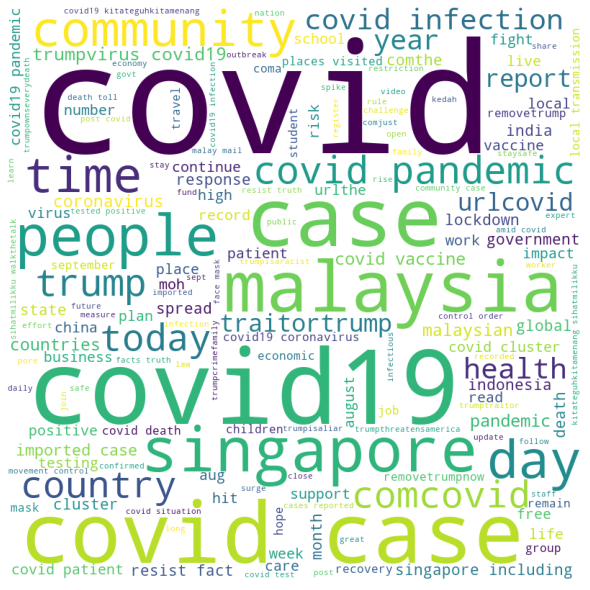

In [59]:
tweets = set(df['tweet'].values.tolist())
tweet = ''

for text in tweets:
    try:
        if(detect(text) == 'en'):
            text = str(text)
            tokens = preprocess_text(text)
            if tokens[-2:-1] == ['com']:
                tokens = tokens[:-1]
            print(tokens)
            tweet += " ".join(tokens)
    except:
        pass
    
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, min_font_size = 10).generate(tweet)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

total hypocrisy in quarantine covid19
covid 19 17 new cases one casualty bringing death toll to 126
the philippines is seeking a fresh 6 million p29 1 billion loan from the world bank wb to extend its conditional cash grants to poor families amid the coronavirus disease 2 19 covid 19 pandemic
f b outlets at bugis junction orchard central among places visited by covid 19 cases
orchard road malls geylang serai market among new places visited by covid 19 patients while infectious pic twitter com zdiyol qs4
the ultimate guide to recent covid 19 measures updates in s pore because everything changes too fast liao
the government hasn t done enough to ensure adequate social protection for those who fall through the cracks and can t access aid distributed to tide over job losses evictions and shutting down of business due to covid 19
77 new covid 19 cases in singapore including 2 in the community pic twitter com 8oig1iguki
steroids can be lifesaving for covid 19 patients scientists report
scien

miti is working with business leaders and partners across malaysia to revitalise economic activities impacted by covid 19 it s important we work together with industry players across all states to build strategic partnerships that benefit the malaysian nation pic twitter com biv3luba 8
covid 19 five arrested 1 5 fined in inspection on kuching entertainment outlet
japan plans to provide covid 19 vaccine to all citizens for free zero hedge
europe can live with covid 19 with local lockdowns who regional director pic twitter com jpkzawfmql
nstnation malaysians cash usage had declined to 64 per cent since the beginning of pandemic covid19 ewallet onlinepayment
covid 19 pm muhyiddin hopes malaysia singapore can finalise procedures for daily commuting pic twitter com er9ds5ncps
opening up without control of covid 19 is recipe for disaster says who
nstworld if everyone sticks to the guidelines and rules coupled together with all our public health measures we can make this work jacindaadern new

irony batman actor robertpattinson got covid 19 which started from his bats he should have been immune to bat viruses
41 new covid 19 cases in singapore including 3 in the community and 7 imported
ippt ict to resume progressively from october nsmen returning for training will get tested for covid 19
hollywood actor dwayne the rock johnson family infected by covid 19 video
it s amazing to see a movement start from the actions of one person from one meal to feeding 25 migrant workers ankit goel and our team worked to make an impactthatmatters during covid19 everydayimpact
exclusive asian football confederation and agency fma to renegotiate their landmark eight year media and sponsorship rights deal after covid 19 hits sales process and match schedule
51 new cases of covid 19 in s pore on aug 29 1 in the community 3 imported cases pic twitter com elelcrcph
us airlines drop change fees amid covid 19 downturn pic twitter com 3dvnesxqtl
prof wang linfa director of emerging infectious disease

it s f i n g e r l i c k i n good mashablesea kfc covid19
update visitors to camera shop at excelsior shopping centre to be tested for covid 19 77 new cases in s pore pic twitter com w3kddgexra
we congratulate yb datuk frankie poon minister of health and people s wellbeing sabah the sabah statehealth department and all the front liners for containing covid19 and are looking forward to our continued collaboration pic twitter com vzogcxmlev
doublestandards blur the line between right wrong justify crimesagainsthumanity eventually will destroy your homeland time to accept truth as it is 1 removetrumpnow trump trumpisnotwell trumpcrimefamily trumpthreatensamerica covid19 resist truth pic twitter com z2vw2z6mct
it s almost time to go back to school kids can staysafe by keeping their hands clean avoiding touching their face covering their coughs sneezes maintaining a physical distance of at least 1m from others covid19
it seems justice reason and epidemiological science prevailed covid19
it 

when the sinus acting up in public but you re holding your sneeze in cus you don t wanna be mistaken for having covid pic twitter com x452znvomh
scientists see downsides to top covid 19 vaccines from russia china
businesses especially smes should embrace digitalisation to remain competitive and relevant in the economy as the covid 19 outbreak has brought the inevitability of the digital economy pic twitter com ezbd gq1r
three new clusters in dormitories orchard road malls and sentosa attractions visited by covid 19 patients
covid19 17 new cases two local transmissions recorded pic twitter com c198rpz8ea
selangor journal merdeka belongs to everyone malaysians of all races fought covid 19 together mb pic twitter com hxtfkta4jw
why extend rmco but not loan moratorium guan eng proposes another rm45b in covid 19 aid malay mail
south korea sect members donate blood for covid 19 research pic twitter com 3wdaydqswg
encouraging to see americans more concerned about climatechange despite the wei

international flights to beijing resume after five months as china eases covid 19 restrictions
just in singapore reports 41 new covid19 infections including 3 in the community and 7 imported cases pic twitter com zcgcgydhhd
tomorrow s askst talk is on how to manage money during the covid 19 crisis you can catch the video on the straits times facebook page on 28 aug 7pm pic twitter com flai1elu5o
cops record khairuddin s statement at parliament over covid 19 quarantine violation
all prepped for the ballot boxes following the requirements of the sop to prevent the spread of covid 19 only a limited number of seats and space will be provided for officers parties and media personnel slimpolls pic twitter com ym1ot198zh
tahukah anda kenapa perlu duduk di rumah breakthechain covid19 kitamestimenang pic twitter com n37lbi2gy
dahlia kept asking for friends and we suggested she can meet her friends at school she complained she can t play with her friends or the toys at school because of the viru

technological change beyond covid 19 pic twitter com goohclffjn
nstworld travellers would be subject to centralised quarantine on arrival for 14 days and have to take two covid19 tests a beijing city official told reporters china coronavirus
fewer than 1 in 1 choose to participate in hong kong s free mass testing for covid 19
i really hope this whole covid ting in malaysia be gone before the total cases reached 5 digit
nstworld hogan broke a 14 day quarantine after arriving in ireland and failed to limit his travel in a county in the midst of a localised lockdown covid19 pandemic
malaysians more digitally inclined cash usage declined since covid 19 pic twitter com 29anamhcgf
me trying to swat away all that covid pic twitter com gsomimctvn
nstworld he is the fourth member of the presidential family to test positive for the virus covid19 coronavirus pandemic
breaking covid19 status in malaysia as of 28 august 2 2 new recoveries 36 total recoveries 9 3 new cases 1 total cases 9 3 6 active

myanmar reports biggest daily rise in covid 19 infections pic twitter com 44veif6q15
nstleader ironic that the very things that are supposed to save and protect us from covid19 are also now slowly killing the earth pollution recycling facemask ppe handsanitizer gloves
shit based perception is not equal to fact based opinion treating stupidpeople with respect is an insult to knowledge stop insulting knowledge removetrump trump trumpisaliar trumpviolence trumpviruscatastrophe covid 19 covid19 trumpriots traitortrump facts truth pic twitter com x9nqvdbr7w
trump is the only criminal in the history of mankind whose guilt has been proven beyond a reasonable doubt even before the trial removetrumpnow trumpriots trumpterrorism trumpviolence trumpvirus covid19 trumpcrimefamily trumptraitor traitor trumplies resist truth pic twitter com n37bhbml2r
political meddling disorganization and years of neglect of public health data management mean the country is flying blind why the united states is hav

fauci says he was under anesthesia when cdc changed covid 19 testing guidelines
droplet has the word drop in it while aerosol has the word aero air in communication to the public how words sound matter not just their technical definition continuing to state a respiratory virus has little to do with air is aerosol covid19 ventilation
the house i bought 1 years ago is great but i still love my old house because of people who gathered in this house there are no great countries nations there are great people there is no 2nd homeland removetrump traitortrump trumpvirus covid19 trumpchaos resist truth pic twitter com rjjfkh2qkj
amid the covid 19 pandemic the international penang bridge pbim 2 2 marathon will go virtually state tourism development arts culture and heritage committee chairman yeoh soon hin said that pbim will give a different experience as it would through a global virtual app pic twitter com 55vhrs5q59
melaka official sanitisation of mosque a preventive measure no congregant 

infografik covid19 perintah kawalan pergerakan pemulihan pkpp 31 ogos 2 2 infographics covid19 recovery movement control order rmco aug 31 2 2 pic twitter com xidbu7hu5o
take part in our media awareness campaign today if you re a media practitioner or journo share with folks your experiences navigating the new normal with covid19 the shift to the digital divide a new govt use the mediawewant and siapajagamedia hashtags we ll start
here s the 3 september update on the covid 19 situation in singapore for more pic twitter com wbhjbl l r
new covid 19 cluster at singapore s biggest dormitory that was previously cleared grows to 175 cases pic twitter com piokzrw4xw
parliament s pore has done well in fighting covid 19 though govt would have done some things different with hindsight says pm lee
covid is probably the greatest challenge we ve ever faced but it s also brought out the best in malaysians and proven that our ability to love and care has not diminished are we perfect hell no but it s

due to total lack of adequate response trump thinks he is invincible removetrumpnow trumpisunfitforoffice he is illegitimatepresident trumpterrorism trumpriots trumpviolence trumpvirus covid19 trumpviruscatastrophe trumpcrimefamily trumpmustgo resist truth pic twitter com vlnm4vqq8h
jack sheehan raphael heffron co author article on rethinking international taxation energy policy post the covid 19 crisis for developing countries in leading international journal dfdl southeast asia tax energy natural resources law pic twitter com ntmgo1vmtf
sjk c subang confirms covid 19 case report pic twitter com w8wwjzz8p1
selangor journal three new covid 19 cases detected at military hospital melaka pic twitter com c2irmjudck
sjk c subang sahkan kes covid 19 laporan pic twitter com px43tsbvcr
when our country needs help we don t ask why or end up in endless debates with those who are not interested in finding truth we just do what our country needs us to do removetrump trump trumpchaos trumpviolence 

covid 19 six new cases death toll rises to 127 with latest fatality updated
hong kong health workers activists urge boycott of mass covid 19 testing pic twitter com uyoiw1oyfr
ai powered tool detects lung infection in chest x rays quickly during covid 19 screening
covid 19 deaths per 1 k pop us 54 99 singapore 46 total deaths us 18 342 sg 27 if us kept mortality rate as low as sg the us would have 1 518 deaths excess trump deaths in us 178 824 nb avg new fatalities trailing 2 mos us 8 day sg
australia s victoria state reports 81 new covid 19 cases pic twitter com l9gxxdh5a
covid 19 cases dip to five today all malaysians
check out my latest article taking learning outside the classroom a response to covid 19 via
yup the rock and family has covid
south korea sees 11 fold surge in covid 19 patients with severe condition
australian state of victoria faces massive class action over costly covid 19 lockdown
dwayne johnson reveals he got covid 19 but fought through emerged stronger pic twitte

india reports record daily jump of 83 883 covid 19 infections pic twitter com ndbvvn1sxe
its not the covid its the prolonged unnecessary lockdowns ridiculous nonsensical sops and closed restricted borders tht has shaken the business fabric to its core and it will only get worse
philippines extends partial covid 19 curbs in manila until sep 3 pic twitter com qymezlmqki
european children return to school amid covid 19 fears pic twitter com ypy1gjxfvy
tahukah anda kenapa perlu duduk di rumah breakthechain covid19 kitamestimenang pic twitter com n4wxm8huqo
i miss thailand sm i cant wait to go back post covid
sabah to ban people from states with high covid 19 cases
1 days without local covid 19 infection in thailand pic twitter com ouexfjz9e
in the midst of the covid19 pandemic questions usually asked by immunologists studying the human immune response to viruses are now on everyone s lips check out this commentary co authoured by professor antonio bertoletti from eid programme
the world is

hi all i m in the midst of interviewing for stories of malaysians who have lost their jobs during covid 19 and took up a new skill while looking for a new job if you have malay friends to share their stories i d be very grateful drop me a message
twogether s2 and vagabond s2 are they even gonna happen both need good filming site from many different countries now covid please just go i m so tired already living like this
gobear lays off 22 people to cut further costs amid covid 19 pic twitter com towzrmjdsa
promising moderna covid 19 vaccine shows immunogenicity in older patients via covid19 coronavirus
in our dark times we need a focus on positive stories no matter where they re found one of the causes close to my heart is the campaign against acid violence due to covid19 acidattack survivors have suffered
how to overcome maskne before this i ada buat thread about maskne today i nak share a few ways you can do to overcome it nak senang memang kita fikir tak payah pakai face mask terus 

rob pattinson got covid 19 smh he s batman he got bats from wuhan ke in his cave
kes positif mengikut negeri setakat 3 8 2 2 12 pm confirmed cases by state as of 3 8 2 2 12 pm covid19 kitateguhkitamenang sihatmilikku walkthetalk pic twitter com owcnukqopt
six months after covid 19 strikes indonesia questions linger over healthcare capacity and equipment pic twitter com rc8sdcum1y
young humanitarian month hot weather will not stop covid 19 from spreading cuaca panas tidak akan menghalang covid 19 merebak younghumanitarianchampion kitajagakita spreadfactsnotfear pic twitter com 2dayfbbiyi
covid 19 is sucks but it shows all my friends true colours
coronavirus latest as coronavirus cases are rising among children and college students new concerns are mounting among experts including dr anthony fauci that testing for covid19 will fall off after the cdc gov suddenly changed its guidelines pic twitter com hlwye8nwnp
this is even better a member of parliament brought up bts s bangbangcon live 

orchard road malls geylang serai market among new places visited by covid 19 patients while infectious
the penang bridge international marathon pbim 2 2 will be going virtual amid the covid 19 pandemic state tourism development arts culture and heritage committee chairman yeoh soon hin pic twitter com 2ijeewtacv
philippines confirms 3 249 new covid 19 infections 97 deaths pic twitter com cffjp9v 8h
as passengers continue to stay home airlines are removing seats to make space for more cargo via avgeek aviation covid19
incredible australians rooftop solar up 41 in second quarter vs same period a year ago despite covid 19 2 4 million rooftop solar pv systems installed with 9 7gw capacity 29 of suitable households now have panels on their roofs pic twitter com nmjbvim814
sampah la org2 mcam ni aduhhhh is covid a joke for u guys
wp s louis chua covid 19 might be rainy day for some but tsunami for less privileged pic twitter com ub7cvknz8c
first us covid 19 reinfection case identified in nev

sad state of affairs for the indian army modi govt should realise the poor conditions at army is the reason for these early retirements instead of resolving the poor conditions they have opted to force them to stay blame covid as usual for all failures
tour de france teams to be expelled for two covid 19 positives in entourage pic twitter com 1ij9xtf vc
all penang adventist hospital staff test negative for covid 19
sultan mosque closed on friday after visit by covid 19 patient to reopen saturday after thorough disinfection
isu ni dari xde covid sampai ada covid lols braces doesnt mean u are rich its not even a style or trend its stupidity to do so when u have no necessity
s korea stops short of toughest covid 19 measures despite case rise malay mail
peru with world s deadliest covid 19 outbreak readies to start vaccine tests pic twitter com bdt7hwerkg
ngee ann city paragon geylang serai market among new places visited by covid 19 patients while infectious pic twitter com bnpeivrjgu
run

covid 19 opens new opportunities for secondary aluminium manufacturers pharma real estate to fuel demand covid19 secondaryaluminium pharma realestate fueldemand jindalaluminium alcirclenews
malaysia reports 2 new covid 19 clusters 1 more death pic twitter com s8mqnrlaps
1 f b outlets fined some ordered to suspend dine in services after breaching covid 19 safe distancing measures pic twitter com lzlh6g6pjx
brazil surpasses 12 covid 19 deaths
slr revolution at excelsior mall designated new covid 19 cluster after another employee tests positive pic twitter com u6y82cthp5
indian school paints village walls for outdoor covid 19 pandemic classes pic twitter com waviwnbodw
our visa process is almost done and was approved first stage but the us embassy is still closing due to covid 19 causing us to not get an interview yet we could not get married this year as we planned to and have been separated for almost a year now since nov 2 19
international flights to beijing resume after five months as

the occupancy rate of intensive care unit beds in 67 covid19 referral hospitals in jakarta has reached 71 as only 14 icu beds remain
1 6 it is widely assumed that a covid 19 vaccine will come to our rescue soon this is unlikely to be true but more importantly it is a dangerous assumption on which to plan the overall response to the pandemic via
france reports 7 379 new covid 19 cases just shy of lockdown record pic twitter com gu5xej9nad
bwf to carry out covid 19 testing in major championships
auckland exits lockdown as new zealand again eyes covid 19 elimination
these are the numbers of covid 19 cases today 28 august 2 2 remember to observe safety and protective measures when you re out and about thesundaily mco rmco pkp pkpp stopcovid19malaysia covid19malaysia newnormal malaysia wearamask thesun pic twitter com aqdzl8f9sp
indonesia reports new record high in daily covid 19 cases pic twitter com tuhuy8dakm
41 new covid 19 infections in singapore including seven imported cases and thre

moh expects a surge in covid 19 cases by year end
your homeland needs your help more than ever what holds you back removetrump trumpriots trump trumpviolence trumpisalaughingstock trumpisacompletefailure trumpvirus covid19 trumpfailure trumpcrimefamily trumprussiacollusion resist resistersunite fact truth pic twitter com bpsixiziyg
new cluster found 14 covid 19 cases recorded
he added that the health ministry would be announcing the details on countries which have recorded more than 15 positive cases of covid 19 later
several orchard road malls among places visited by covid 19 cases during infectious period pic twitter com qjbobdshob
singapore passengers cleared to board scoot flight to guangzhou after covid 19 test scramble
how the covid19 pandemic in indonesia provided textile designers with an opportunity to make millions of masks every day
the d614g strain of covid19 isnt new many news outlets in se asia are blowing it out of proportion but was se asia spared from a worse outbreak 

covid 19 1 f b outlets fined for breaching safe distancing measures 5 of them also get harsher restrictions pic twitter com 9mavjk8jkd
update singapore confirms 6 new covid 19 cases three in the community pic twitter com dseudml21b
new zealand s prime minister jacinda ardern auckland covid outbreak remains contained need to take a cautious approach will retain current covid alert settings and review them on september 14 bbg nzdusd
actor dwayne johnson says his family went through covid19 pic twitter com jdbj3ilzwr
a rise in cases with unknown transmission routes and a growing number of patients in critical condition is fueling concerns of a larger covid19 outbreak in south korea
pkpp rmco mco covid 19 pic twitter com 9jvrnkd9u4
7 cen tral banks in clude ren minbi in fx re serves covid 19 brings op por tu ni ties for fur ther in ter na tion al i sa tion renminbiinternationalisation pic twitter com txx9grbzz7
it s to ensure the legal mechanisms remain in place to fight against the spread

although this year calls for a shift from our yearly celebrations due to covid19 what remains constant is our love for the nation and the strength we have as a society even a global pandemic shall not break our spirit of unity as we continue to stand united
our mask up project aims to assist b4 families in protecting themselves against covid 19 in the best most sanitary way possible by providing each person with their own 3 layer reusable mask donate via the link in our bio to help families battle this pandemic maskup pic twitter com flonmwlif1
bad day for bhakts modi s monkey baat got more than 7 lac dislikes tension at the lac has escalated then comes gdp contracting news 23 covid cases rising highest in day 8 today what how will they defend the indefensible
don t let stupidity stand next to your knowledge restore commonsense removetrumpnow trumpisnotwell trumpriots trumpvirus covid 19 trumpviolence trumpszombiearmy traitortrump trumpisunwell trumpisaracist trumpfascism treasonoustra

covid 19 status update 4 pm 25 8 2 2 kkm kementeriankesihatanmalaysia mkn majliskeselamatannegara rmco stayhome fightcovid19 rentaksejuta proboards pic twitter com acz9vgbdtv
building climate resilient infrastructure in the post covid19 world will require communication and collaboration with the public sector and local communities via brink news
as of 3 aug 2 2 12pm we have confirmed and verified an additional 54 cases of covid 19 infection in singapore breakdown 7 imported 8 cases in the community 39 cases residing in dorms
after months of heartache signs of covid 19 easing in brazil
49 new covid 19 cases in singapore including 3 in the community and 3 imported
there are many beautiful places in the world but only one we call home there is no 2nd homeland by 2 2 election it might be too late removetrump trump trumpfailure trumpviolence trumpriots trumpvirus covid 19 covid19 trumpisacompletefailure trumpisalaughingstock pic twitter com b1m71to4la
runformaldives is an online running eve

japan in deals with astrazeneca novavax for covid 19 vaccines
global order and international cooperation in the age of covid 19
covid 19 new cases in malacca but infectivity remains low pic twitter com 3zb242gk z
attention please south korean megachurches open their doors while shincheonji church remains shut covid 19 shincheonjichurch korea bts twice kpop covid19 god jesus bible pic twitter com ug3kxq9oa1
when did u reach santorini in this covid times
multiple locations including vivocity sentosa orchard rd visited by covid 19 cases 3 community cases unlinked pic twitter com qg2zif851g
trump is an insult to humanity removetrumpnow trumpisunfitforoffice indicttrump traitortrump treasonoustrump treason trumptraitor trumpownseverydeath covid19 trumpisaliar trumpisaracist racism racistinchief trumpkillsusps resist strongertogether facts truth pic twitter com mfkpsvnech
we may have had to postpone sg anzics but we are back with our first ever virtual conference apics 2 2 this is an entirel

i ll be going down to a few cafes see the thread below come say hi safely ofc and let s try to navigate covid times together 3 to redeem a free photocard follow on twitter like and retweet this post pic twitter com 56dp8uhvnk
5 though there is no evidence of risk of contracting covid19 from consuming food it is better to be safe by not sharing food and drinks at the moment don t share cups and cutlery too staysafe pic twitter com xdic9imhed
the industry is certain to be in a worse situation post covid 19 unless agency ceos and advertiser cmos redefine their priorities what must change via
happy 63rd independence day to all malaysians together let s win the battle against covid19 malaysiaprihatin merdeka63tahun pic twitter com edhfzejsi8
australia reports record one day rise in covid 19 deaths malay mail
we cannot allow covid 19 to derail us from our goal a malaria free asia pacific check out recent newsletter here pic twitter com 9cxl7ck6nc
51 new covid 19 infections in singapore inclu

air travel within china almost returns to pre covid 19 levels
join us as we explore these new financing options and consider the benefits of partnerships in social protection programming 4 sept 2 2 11 am sgt register now this is the first of a 3 part covid 19 webinar series co organised with
kfc now thinks licking your fingers is not the best idea the restaurant chain is temporarily retiring its long running finger lickin good slogan due to covid 19
italy are in danger of getting a second peak of covid19 let s hope not and we see it level off if not decrease in the coming days pic twitter com stxmhe7nqx
as of 25 jul 2 2 12pm we have confirmed and verified an additional 513 cases of covid 19 infection in singapore breakdown 6 imported 2 cases in the community 5 5 cases residing in dorms
plt gubernur gebrak masker ingat covid ingat masker pic twitter com fqynqqxz6p
ingatkah anda apa yang perlu dilakukan jika bersalaman breakthechain covid19 kitamestimenang pic twitter com urz4rg1ldj
covi

covid 19 wearesorrynengi nation hate modi fadedftloey bbnaijia2 2 deprem deprem astro hbdsadhguru speakup rrbexamdates superjuniordne viral indonesia jokowi
students return to class in wuhan but parents and teachers wary of covid 19 risk pic twitter com kan7fw2vpp
staying home means staying safe from covid19 however for victims survivors of domesticviolence being confined at home with their abusers may bring on heightened frequency and severity of abuse endangering the lives of the often female victims join us on 2nd september
iata calls for countries to reopen borders continue relief measures awaninews awanipagi englishnews covid19
indonesia records 3 622 new covid 19 cases thursday pic twitter com 2q4rqsikr4
good but bhai 2 cents dont waste time in media and twitter hit the ground help people who are struggling with covid treat this media people like jaya and modijee
here s the 1 september update on the covid 19 situation in singapore for more pic twitter com m5vj3mnbmz
labour crunch

q we can t go anywhere because of covid 19 but where would you like to go the most it s unfortunate that we can t travel there s so many places i want to visit i ve said this before but i reallyyyy want to go to saipan pic twitter com 3c9iv6ztsi
infografik tabung covid 19 infographics covid 19 fund pic twitter com srfi8b3h5l
handled covid 19 well please don t let religious fanatics tear malaysia apart especially not during a pandemic when all of us are suffering with pay cuts job losses and a permanent fear of not just a mysterious virus but overzealous authorities stalking us
berlin halts rally against covid 19 restrictions as european cities protest masks
the idea that freedom means freedom to express through that we hate puts humanity at risk stupidity hates intelligence hatespeech is not part of freedomofspeech because racism is crime trump trumpisaliar trumpviolence trumpriots trumpvirus covid19 resist fact pic twitter com g75o3ctm1l
hitler didn t kill millions the next day after 

special arrangements in place for china bound travellers required to take covid 19 test say singapore authorities
our marketing director was featured in this interview on hunger hurts work especially during this covid 19 period do watch this video and support our maskup project watch malaysians come together during pandemic
more covid 19 patients in south korea have unclear infection routes
if illegitimatepresident the dumbest man alive trump serves full term hopes to fix damaged reputation might be baseless removetrumpimmediately trumpvirus trumpthreatensamerica trumpisunfitforoffice trumptraitor covid racistinchief resist factfocus truth bluewave pic twitter com vgtqkcuadi
selamat hari kemerdekaan ke 63 malaysia happy independence day merdeka may be celebrated differently this year but let s channel the spirit of freedom into our continuous efforts to fight against covid 19 selamatharimerdeka independenceday pic twitter com ema4uordlz
info kkpb covid19 kitajagakita patuhsop amalannor

daily dose 5 agong grants early pardon to 13 convicts us nears 6 million covid 19 cases via
nstworld global covid19 cases surpass 25 million
steroids can be lifesaving for covid 19 patients scientists report
coffee ketchup and nike air max it s the covid consumer economy malay mail
one more covid 19 death six new cases
documenting the positive impact of our remote case management tips for social workers during covid 19 with masw made possible with the support of govt of denmark click here to find out more
white house slams who over criticism of push for covid 19 vaccine pic twitter com uty6t65toi
some 93 said they were satisfied with the government s performance in managing the covid 19 pandemic malaysia is another bright spot in the region in fact most of the asean are public health officials everywhere shd learn frm re his pitch perfect crisis comm
stay healthy my friends dwaynejohnson therock covid19
as of sept 1 12pm malaysia has confirmed an additional 14 cases of covid19 with 5 i

pas spiritual leader likens minister who broke covid19 quarantine rules to quranic hero blames health foreign ministries for negligence instead pas members should not sit still the hero who saved malaysia was persecuted pic twitter com yhmlyiqu7m
this worldentrepreneursday we highlight the tremendous creativity and innovation that our covid19detectprotectchallenge winners have displayed in their opensource solutions to combat covid19 read exclusive interviews with the prize winners pic twitter com vcgmkwmuvs
globalbuzz the total number of covid 19 cases in myanmar has surged to 882 with 95 more confirmed cases reported on monday night ministry of health and sports pic twitter com 3q 64hyuwf
trump wasn t elected traitorinchief was installed removetrumpnow trumpfailedamerica trumpisanationaldisgrace trumptreason treasonoustraitortrump trumpgenocide covid19 trumpisatraitor racistinchief racism trumpliespeopledie strongertogether resist truth facts pic twitter com wg9zstve1
three new covid

cannot beach date covid time mehh so we hello hello beach only hahahaahha
as opposed to managing congestion could the imminent erp hikes be a means to generate income to pay for the covid 19 bail outs
infografik covid 19 perintah kawalan pergerakan pemulihan pkpp 29 ogos 2 2 infographics covid 19 recovery movement control order rmco august 29 2 2 pic twitter com xi2fang6ce
deepening the canada asean trading relations for mutual covid19 economic recovery is a priority for in 2 2 and the new normal ahead as a voice of the canadian privatesector the cabc attended the 9th aem canada consultations on 29 aug
scientists see downsides to top covid 19 vaccines from russia china pic twitter com 4ldcwowdvm
indonesia s new covid 19 cases hit another record high at 3 3 8
child marriages on the rise in india amid the covid 19 pandemic
19 8 2 19 8 8worldnews 2 19ncov novelcoronavirus coronavirus covid19 pic twitter com s9mkq8h4dd
stupidpeople don t respect anyone they don t respect themselves otherwi

nstworld they can picture how things would be if they died of covid19 coronavirus indonesia jakarta
our volunteers are usually from local communities and that has helped us in carrying out relief operations says covid19 adds extra complexity to disaster response yet redcross redcrescent teams are still support their communities
bintang batman robert pattinson didapati positif covid19 pic twitter com sedcytalgu
as infections continue to climb across indonesia 1 million boarding school students are stepping up safety measures to prevent covid19 indonesian red cross volunteers are supporting the students and people most at risk thank you volunteers for your incredible work pic twitter com lt9wxqzgdl
latest update for covid19 in malaysia as of july 21 pic twitter com a1c7jhvhm3
covid 19 testing to be offered to more community groups like taxi drivers food delivery workers and hawkers
just in covid 19 no new locations visited by covid 19 persons 72 cases discharged pic twitter com bfaefmzbg

wawasan 2 2 sponsored by covid 19
the economic crisis was a result of lockdowns and their extension against scientific advice the covid pandemic s effect pales in comparison to the wounds inflicted intentionally by th govt voetsekramaphosa
india will overshoot brazil much ahead of 15th september prediction to be second most affected covid19 country globally
brazil reports 566 covid 19 deaths on sunday pic twitter com jplo2ugodk
singapore retail sales fall 8 5 in july as covid 19 continues to pummel sector
nigerian entrepreneur olubunmi aderinsola agbato has had to make some tough decisions for her fish processing business due to covid19 related restrictions find out about the impacts on her business and what govts can do aquaculture pic twitter com dcnghv6gco
clusters of covid 19 infections cropping up in seoul pic twitter com lmw5tnrwez
kedah hit by fifth covid 19 cluster now involving hospital staff pic twitter com 9jvtmmd32g
still remember kedah is one of the negeri yg pulih covid p

this is not right at all sg buloh hospital was the centre for treating covid 19 frontliners there have been subject to so much risk and stress baik pecat beberapa orang menteri dan timbalan menteri dan salurkan gaji dan elaun mereka kepada frontliners
senior pboc official covid presents china with opportunity to drive cap i tal ac count open ing ren minbi in ter na tion al i sa tion pic twitter com xf8pmaas5x
missed the clc webinar on amsterdam leading the way towards car lite cities watch the full webinar here stay updated on future webinars mobility covid19 cycling clcsg pic twitter com sivu3tgxmz
if you suspect that your home may be exposed to the covid 19 we here at insurance market singapore has provided some tips on how to clean or properly disinfecting it read more homeinsurance homecleaning insurancemarketsg pandemic pic twitter com go7qfryp5b
beauty industry can weather covid 19 with innovation taitra
addenda to president s address mindef minlaw mha mfa lay out plans to fight 

in china an asymptomatic bus passenger infected nearly 2 dozen others with covid19 even though many were not sitting close by according to researchers details pic twitter com pjdnngtvzl
report says one of the students at sjk c subang has tested positive for covid 19 via
here s some goodnews a star scientists found a sarscov2 variant causing milder covid 19 called 382 patients with this variant had less severe covid19 infections and a better immune response given this the variant may be used in vaccines pic twitter com fff8mmrlbu
older patients drive south korean surge in critical covid 19 cases pic twitter com hihas9s25a
together we can make a big difference to break the chain of covid 19 transmission credit to all our staff particularly the team from sungai buloh hospital we can make the impossible possible
covid 19 neck gaiters bandanas should not be used in place of face masks says moh via
yes the lancetgate retraction was in june there have since then been numerous studies showing 

thank you very much my friend hugs removetrumpnow trump trumpviolence trumpstroke trumpriots trumprussiacollusion trumpvirusdeathtoll185k covid19 traitortrump traitors trumpisaracist resist resistance resistersunite strongertogether truth pic twitter com vypeoiwh3
4 trumpisacriminal his gang try to undermine fauci his knowledge is vital trumpcoronavirusrally packed no social distancing other measures trumpisaracist covid 19 death rates among black hispanic latino are higher than for white
dr noor hisham 12 87 amanjaya residents screened for covid 19 thus far
here s the 31 august update on the covid 19 situation in singapore for more pic twitter com 3x9xrshzvh
doj policy contradicts 3 7 of constitution following unconstitutional policy an insult to ruleoflaw we can t respect the law by breaking the law trumpisunfitforoffice trumpisacompletefailure trumpterroism trumpriots traitortrump racism trumpmeltdown covid 19 truth pic twitter com oxwc7 hv6l
pn government s first legislative act du

eu offers 4 million euros to who led covid 19 vaccine initiative
covid 19 total cases so far updated daily
covid 19 in malaysia numbers at a glance as of 23rd august 2 2 12 pm covid19 kitateguhkitamenang sihatmilikku walkthetalk pic twitter com oyfjbuiwsp
the biggest mystery is not that the dumbest man alive trump holds the highest office it is why the system still hasn t removetrump despite fact that traitortrump puts 3 lives risk is nationalsecurity threat trumpisanidiot trumpvirus19 covid19 resist truthwins pic twitter com nqa6r5mckw
postmodern jukebox star ariana savalas on covid 19 pmj stories touring her famous dad more
after months of operations and having cared for over 14 recovering covid19 patients the changi exhibition centre community care and recovery facility stood down today sms thanked personnel for their professionalism and commitment towards caring for these patients pic twitter com tgvvtsh7ka
bhutan lifts tobacco ban due to covid 19 pic twitter com iqaduwkbjz
malaysi

1 first submitted to the lancet in april just before the explosion of cases here and finally found its home in cid four months later it feels like an eternity since we had only 1 covid19 cases in singapore idtwitter sarscov2 pic twitter com vbhaqvbuqf
covid 19 in malaysia numbers at a glance as of 1st september 2 2 12 pm covid19 kitateguhkitamenang sihatmilikku walkthetalk pic twitter com kadudhf5hc
covid 19 in malaysia numbers at a glance as of 31st august 2 2 12 pm covid19 kitateguhkitamenang sihatmilikku walkthetalk pic twitter com l4pzxfacxa
at the 52nd aem virtual meeting which concluded yesterday malaysia shared its support in data sharing among countries for covid 19 vaccine development malaysia s participation was led by yb dato seri mohamed
producers of traditional herbs in indonesia marked higher profit in the first half of 2 2 as locals turned to them for protection against the coronavirus indonesia s herbal remedies boom amid covid fears
understanding temporal changes to co

more covid 19 test booths to be distributed around singapore because it s safer
how are you celebrating milestones achievements during covid 19 let and know on bizbytes at 12pm pic twitter com 34xcrykrrn
studies are showing that covid19 can be detected in stool samples and anal swab samples for weeks and a recent case on an airplane identified the airplane bathroom as the potential source
soukor has been closed down again for increasing covid cases and this fella tak pakai mask he attacked each and every one that said something about wear your mask etc dia berdegil tak nak pakai
chinese high yield property bonds have outperformed emerging market peers in other sectors and geographies as the country leads the world in reopening post covid 19 however the return of trade tensions has come with implications pic twitter com paq52aaz4i
malaysia s new covid 19 cases rise to 17 today death toll now 126
kes positif mengikut negeri setakat 31 8 2 2 12 pm confirmed cases by state as of 31 8 2 2 1

pm lee hsien loong delivers address on singapore s response to the pandemic and preparing for life beyond covid 19
mcdonald s outlet at pasir ris sports complex starbucks at bugis junction among places visited by covid 19 cases while infectious pic twitter com ouy6e1i9ot
the newnormal customer consumerbehavior has changed radically in response to e covid19 lockdown how it affect finserv banking ux cx fintech insurtech
crew aboard ship with covid 19 cluster did not disembark in singapore aside from those certified healthy mpa pic twitter com f2kmelmnb7
i regret getting tested avoiding doctors amid fear stigma in a pandemic the psychological impact caused by covid 19 stays longer than the disease say experts
3 don t wait change isn t coming bethechange control your life respect yourself removetrumpnow traitortrump trumpvirusdeathtoll15 k covid 19 coronavirus trump trumpisaracist genocide trumptraitor freedom humanity human humanrights resistance resist resisters pic twitter com 57taeyjqs

64 global media outlets this week including in malaysia publicise blood plasma donation by 4 shincheonji church members for covid 19 cure korea southkorea
when shopping at markets keep yourself safe from covid19 by ensuring your hands are clean and keeping at least 1m distance from others staysafe pic twitter com 9mkeauuepj
pm lee to address parliament at 3 3 pm on singapore s response to covid19 and life beyond the pandemic pic twitter com 1jidcfqxzg
update prime minister yab tan sri muhyiddin yassin just announced that the recovery movement control order rmco will be extended to 31 december 2 2 malaysia rmco extension 31dec covid19 pm staysafe eurochammy pic twitter com uwnuvubdsy
was the suspension of the insolvency and bankruptcy code of india a desirable policy response to covid 19 if not how to make a bad decision work fantastic post by law on the blog insolvency restructuring india sgri pic twitter com vwfg4fgtku
no cramming as new covid 19 rules take hold in south korean capita

trump betrayed his own people and the country removetrumpnow trumplies trumpcult trumpcorruption trumpcolludedwithrussia trumpvirus covid19 coronaviruspandemic traitortrump trumpchoas trumpkills trumpownseverydeath racism genocide treason resist facts truth pic twitter com plfjausk6
strategy vs covid19 scale up diagnosis continuity of essential health services risk communication via communityengagement accessible vaccine dr raji tajudeen pic twitter com 4d5ctxg 3w
happening in a few moments join on a discussion of covid19 and tracing apps speakers from and others dataprotectionhb covid19
spain registers almost 1 new covid 19 cases teletrader roboinfo 12 robotex group
wishing all malaysians a happy 63rd independence day today together we celebrate the caring determined and patient nature of all malaysians in facing the trials and tribulations posed by the covid 19 pandemic malaysia prihatin malaysia cares malaysiakuprihatin merdeka pic twitter com 3zgl13fjih
steroids cut death rates amo

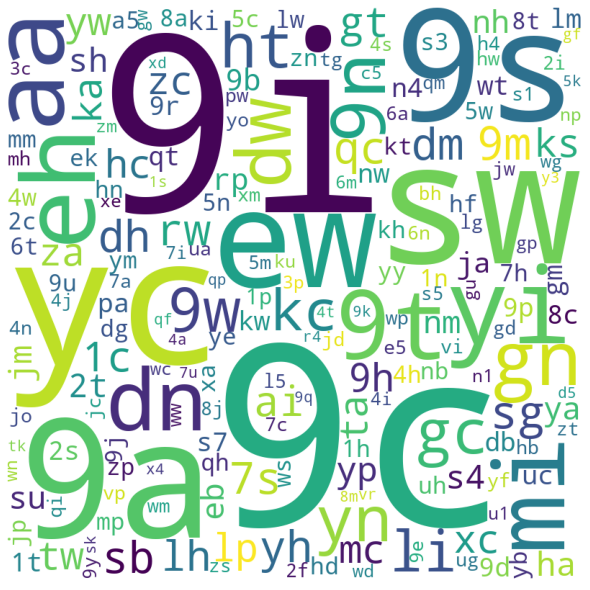

In [28]:
tweets = set(df['tweet'].values.tolist())
tweet = ''

for text in tweets:
    try:
        if(detect(text) == 'en'):
            text = str(text)
            tokens = preprocess_text(text)
            print(tokens)
            tweet += " ".join(tokens)
    except:
        pass
    
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, min_font_size = 10).generate(tweet)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [51]:
tokens = [1,2,3,4,5,6]
print(tokens[-2:-1])
print(tokens[:-1])

[5]
[1, 2, 3, 4, 5]


In [53]:
listo = ['insyaallah', 'will', 'be', 'engaging', 'in', 'this', 'msian', 'students', 'technology', 'week', 'flagship', 'event', 'of', 'young', 'malaysian', 'engineers', 'yme', 'in', 'the', 'uk', 'speaking', 'on', 'healthcare', 'msia', 's', 'covid', '19', 'silver', 'lining', '11', '3', 'am', 'to', '12', '15am', 'today', 'follow', 'live', 'here', 'url', 'url', 'pic', 'twitter', 'com', 'rd8fqnug7p', 'pic', 'twitter', 'com', 'uqvnxwuoxx']

In [58]:
print(listo[-2:-1] == ['com'])

True


In [3]:
df_do = pd.read_csv('Data Online.csv',header = None,encoding='latin-1')

In [67]:
print (df_do.head(10))

   0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
5  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
6  0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY          mybirch   
7  0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY             coZZ   
8  0  1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY  2Hood4Hollywood   
9  0  1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY          mimismo   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Faceb

In [68]:
df_do[0]

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: 0, Length: 1600000, dtype: int64

In [69]:
df_do[5]

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: 5, Length: 1600000, dtype: object

In [ ]:
tweets = set(df_do[5].values.tolist())
tweet = ''

for text in tweets:
    try:
        if(detect(text) == 'en'):
            text = str(text)
            tokens = preprocess_text(text)
            if tokens[-2:-1] == ['com']:
                tokens = tokens[:-1]
            print(tokens)
            tweet += " ".join(tokens)
    except:
        pass

In [74]:
tweets = set(df_do[5].values.tolist())
print(len(tweets))

1581466


In [75]:
print(len(df_do[5].values.tolist()))

1600000


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn import svm 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

In [78]:
tweets = df_do[5].values.tolist()
classes = df_do[0].values.tolist()

x_train, x_test, y_train, y_test = train_test_split(tweets, classes, test_size=0.2, random_state=42)

In [80]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [83]:
from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=10)
clf.fit(x_train, y_train)

print(classification_report(y_test, clf.predict(x_test), digits=4))

              precision    recall  f1-score   support

           0     0.7791    0.8475    0.8119    159494
           4     0.8340    0.7613    0.7960    160506

    accuracy                         0.8042    320000
   macro avg     0.8065    0.8044    0.8039    320000
weighted avg     0.8066    0.8042    0.8039    320000



In [16]:
tweets = df_do[5].values.tolist()
classes = df_do[0].values.tolist()
num = 0
for text in tweets:
    text = str(text)
    tokens = preprocess_text(text)
#     if tokens[-2:-1] == ['com']:
#         tokens = tokens[:-1]
    if num < 30:
        print(tokens)
    for word in tokens:
        if word in stopwords:
            tokens.remove(word)
    if num < 30:
        print(tokens)
    num += 1
    text = " ".join(tokens)
    if num > 30: #nanti buang
        break 
    

#x_train, x_test, y_train, y_test = train_test_split(tweets, classes, test_size=0.2, random_state=42)

['awww', 'that', 's', 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']
['awww', 's', 'bummer', 'shoulda', 'david', 'carr', 'third', 'day', 'do', 'd']
['is', 'upset', 'that', 'he', 'can', 't', 'update', 'his', 'facebook', 'by', 'texting', 'it', 'and', 'might', 'cry', 'as', 'a', 'result', 'school', 'today', 'also', 'blah']
['upset', 'he', 't', 'update', 'facebook', 'texting', 'and', 'cry', 'a', 'result', 'school', 'today', 'blah']
['i', 'dived', 'many', 'times', 'for', 'the', 'ball', 'managed', 'to', 'save', '5', 'the', 'rest', 'go', 'out', 'of', 'bounds']
['dived', 'times', 'ball', 'managed', 'save', '5', 'the', 'rest', 'out', 'bounds']
['my', 'whole', 'body', 'feels', 'itchy', 'and', 'like', 'its', 'on', 'fire']
['whole', 'body', 'feels', 'itchy', 'like', 'on']
['no', 'it', 's', 'not', 'behaving', 'at', 'all', 'i', 'm', 'mad', 'why', 'am', 'i', 'here', 'because', 'i', 'can', 't', 'see', 'you', 'all', 'over', 'there']
['it', 'not', 'b

In [87]:
from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=10)
clf.fit(x_train, y_train)

print(classification_report(y_test, clf.predict(x_test), digits=4))

              precision    recall  f1-score   support

           0     0.7791    0.8475    0.8119    159494
           4     0.8340    0.7613    0.7960    160506

    accuracy                         0.8042    320000
   macro avg     0.8065    0.8044    0.8039    320000
weighted avg     0.8066    0.8042    0.8039    320000



In [118]:
clf = GridSearchCV(text_clf, tuned_parameters, cv=10)
clf.fit(x_train, y_train)

print(classification_report(y_test, clf.predict(x_test), digits=4))

              precision    recall  f1-score   support

           0     0.7791    0.8475    0.8119    159494
           4     0.8340    0.7613    0.7960    160506

    accuracy                         0.8042    320000
   macro avg     0.8065    0.8044    0.8039    320000
weighted avg     0.8066    0.8042    0.8039    320000



In [88]:
print(df['tweet'])

0        As consumers navigate #COVID19, Arttha is enab...
1        Rakyat dari negara yang catat kes #COVID19 mel...
2        #COVID19 Terkini: 3 Sept. Empat kluster catat ...
3        Pulau Pinang dan Johor kembali menjadi zon hij...
4        Penerbitan filem itu terpaksa dihentikan\n#BHh...
                               ...                        
74994    “Kita mendukung agenda pemerintahan, dan optim...
74995    Aku baru perasan tahun 2020 ni kali pertama ak...
74996    Menurunkan nilai Ro atau lebih tepat lagi Rt k...
74997    Aku baru perasan tahun 2020 ni kali pertama ak...
74998    "Our medical frontliners deserve our praise an...
Name: tweet, Length: 74999, dtype: object


In [89]:
print(df['tweet'][0])

As consumers navigate #COVID19, Arttha is enabling #banks to provide their customers with multiple payment options that help them manage their finances. Write to us now!  https://bit.ly/2YtYqfo 
#Fintech #DigitalPayments #MobileWallet #Payments #DigitalBanking #DigitalWallet pic.twitter.com/OTx44JyvpY


In [96]:
df['tweet'][474]

'[JUST IN] MOH has confirmed 48 new cases of Covid-19 in Singapore, as of 12pm on Sep 2.\n\nThere are 2 community cases, 1 S’porean and 1 Work Pass Holder.\n\nThere are also 5 imported cases.\n\nTotal no. of cases in Singapore: 56,908. #COVID19'

In [97]:
clf.predict([df['tweet'][474]])

array([0])

In [98]:
df['tweet'][488]

'As infections continue to climb across #Indonesia, 1 million boarding school students are stepping up safety measures to prevent #COVID19.\n\nIndonesian Red Cross volunteers are supporting the students and people most at risk.\n\nThank you volunteers for your incredible work. ❤️  pic.twitter.com/Lt9wXqzgDl'

In [99]:
clf.predict([df['tweet'][488]])

array([4])

In [101]:
df['tweet'][495]

"#Trump had every opportunity to become someone\n\nInstead, #TraitorTrump chose to become NOTHING\n\n#TrumpTraitor trashed his own life\nHe can't be the nation's leader\nIT CONTRADICTS #CommonSense\n#RemoveTrump\n#TrumpTerrorism #TrumpRiots #TrumpVirus #COVID19 #TrumpChaos #Resist pic.twitter.com/JbdurMKm2J"

In [100]:
clf.predict([df['tweet'][495]])

array([4])

In [102]:
df['tweet'][573]

'#people either love their country or they support #Trump because they hate their country\n\nPEOPLE CANNOT DO BOTH\n\n#RemoveTrumpNow\n#TrumpIsNotWell #TrumpStroke #TrumpViolence #TrumpVirus #COVID19 #Covid_19 #racism #TrumpRiots #Traitors #TrumpTerrorism #TrumpIsALiar #Resist #Truth  pic.twitter.com/ov9A28UccD'

In [103]:
clf.predict([df['tweet'][573]])

array([0])

In [104]:
df['tweet'][678]

'"Droplet" has the word "drop" in it while \n"Aerosol" has the word "Aero-" (air).\nIn communication to the public, how words sound matter, not just their "technical" definition. Continuing to state a respiratory virus has little to do with air is 🤦\u200d♂️\n#aerosol #COVID19 #ventilation'

In [105]:
clf.predict([df['tweet'][678]])

array([0])

In [108]:
print(GridSearchCV)

<class 'sklearn.model_selection._search.GridSearchCV'>


In [116]:
clf.best_params_

{'clf__alpha': 0.1,
 'tfidf__norm': 'l1',
 'tfidf__use_idf': False,
 'vect__ngram_range': (1, 2)}

In [115]:
train_data = []
train_labels = []
for i in range(len(tweets)):
    train_data.append(tweets[i])
    train_labels.append(classes[i])

test_data = [] 
test_labels = [] 
for row in test_corpus:
    test_data.append(row[0]) 
    test_labels.append(row[1])

# Create feature vectors 
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)
# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)
# Apply model on test data 
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear 
model = svm.SVC(kernel='linear') 
model.fit(train_vectors, train_labels) 
prediction = model.predict(test_vectors)
>>> ['Class_A' 'Class_A' 'Class_B' 'Class_B' 'Class_A' 'Class_A']

print (classification_report(test_labels, prediction))

SyntaxError: invalid syntax (<ipython-input-115-2a4a98f9a9a9>, line 24)